<h1 style="padding:15px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:300%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Body signal of smoking Analysis & Prediction
</h1>

<p style="text-align:center; margin-top: 20px;">
    <img src="https://i-cf65.ch-static.com/content/dam/cf-consumer-healthcare/paradontax/es_AR/assets/about-gum-disease/2.2.2_Causes_Smoking.jpg?auto=format" style='width: 300px; height: 300px; border: 1px solid #ddd;'>
</p>

<p style="text-align:justify; ">

Smoking is the act of inhaling and exhaling the smoke produced by burning tobacco. Tobacco smoke contains thousands of harmful chemicals, many of which are toxic and addictive. Smoking affects nearly every organ in the human body and is one of the leading causes of preventable diseases and deaths worldwide.<br>
<br>
People who smoke are at a significantly higher risk of developing serious health problems, including heart disease, stroke, respiratory illnesses, and various types of cancer. Although quitting smoking can be challenging, stopping at any age greatly reduces health risks. Over time, the body begins to heal, improving lung function, circulation, and overall quality of life.

</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px; margin:0; font-family:serif; font-size:130%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:500">Table Of Contents</p>

<div align="center">

| No | Contents | No | Contents |
|:---| :--- |:---| :---- |
| 1 | [Importing Libraries](#1) | 6 | [Correlation Analysis](#6) |
| 2 | [Dataset Overview](#2) | 7 | [Data Preprocessing](#7) |
| 3 | [Exploratory Data Analysis (EDA)](#3) | 8 | [Model Training](#8) |
| 4 | [Feature Visualization](#4) | 9 | [Performance Evaluation](#9) |
| 5 | [Feature Engineering](#5) | 10 | [Conclusions & Closing](#10) |

</div>
</div>

<div style="margin-top: 30px; padding: 15px; border: 1.5px solid #000000; border-radius: 20px; background-color: #ffffff; font-family: serif; color: #000000; text-align: center;">
    The dataset was shared by following link: 
    <a href="https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking/data" style="color: #000000; font-weight: bold; text-decoration: underline;">[Click here to view dataset]</a>
</div>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Importing Libraries
</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

# Set visualization style
plt.style.use("seaborn-v0_8-darkgrid")
# To show all columns
pd.set_option('display.max_columns', 15)

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Dataset Overview
</p>

In [2]:
data = pd.read_csv("data/smoking.csv")
df = data.copy()

In [3]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 27)
Glimpse of The Dataset :


In [4]:
df = df.copy(deep=True)

df.rename(columns = {
    "height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
"waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
"eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
"hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
"Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
"Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
"AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
inplace = True)

In [5]:
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height_cm            55692 non-null  int64  
 4   weight_kg            55692 non-null  int64  
 5   waist_cm             55692 non-null  float64
 6   eyesight_left        55692 non-null  float64
 7   eyesight_right       55692 non-null  float64
 8   hearing_left         55692 non-null  float64
 9   hearing_right        55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting_blood_sugar  55692 non-null  float64
 13  cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  hd

In [6]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

In [7]:
df.describe(include = object).T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

In [8]:
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a979b9a9d8f","color":"white","border": "1.5px  solid black"})

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Data Cleaning
</p>

In [9]:
dup = df[df.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {df.shape[0]} entries in this dataset.")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {df.shape[0]} entries in this dataset.")

There are 0 duplicate entries among 55692 entries in this dataset.

After removing duplicate entries there are 55692 entries in this dataset.


In [10]:
df["gender"] = df["gender"].replace({"M" : "Male" , "F" : "Female"})
df["dental_caries"] = df["dental_caries"].replace({1 : "Yes" , 0 : "No"})
df["tartar"] = df["tartar"].replace({"Y" : "Yes" , "N" : "No"})
df["smoking"] = df["smoking"].replace({1 : "Yes" , 0 : "No"})

In [11]:
counts_sdo = df["ID"].value_counts()
print(counts_sdo[counts_sdo > 1])

Series([], Name: count, dtype: int64)


In [12]:
df["bmi"] = df["weight_kg"]/((df["height_cm"]/100)**2) 
df["avg_eyesight"] = (df["eyesight_left"]+df["eyesight_right"])/2 
df["hdl_to_ldl"] = df["hdl"]/df["ldl"] 

df = df.drop(["ID","weight_kg","height_cm","eyesight_left","eyesight_right","hearing_right","hearing_left","hdl","ldl","oral"], axis = 1)

print(df.dtypes)

gender                  object
age                      int64
waist_cm               float64
systolic               float64
relaxation             float64
fasting_blood_sugar    float64
cholesterol            float64
triglyceride           float64
hemoglobin             float64
urine_protein          float64
serum_creatinine       float64
ast                    float64
alt                    float64
gtp                    float64
dental_caries           object
tartar                  object
smoking                 object
bmi                    float64
avg_eyesight           float64
hdl_to_ldl             float64
dtype: object



<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Table of Variables
</p>

<br>

<div align="center">

| Variable            | Type            | Description                               | Values / Units  |
| :------------------ | :-------------- | :---------------------------------------- | :-------------- |
| gender              | Categorical     | Biological sex                            | Male / Female   |
| age                 | Numerical       | Age                                       | Years           |
| height              | Numerical       | body mass index = weight  / height^2      | kg / cm^2       |
| weight              | Numerical       | Weight                                    | kg              |
| waist               | Numerical       | Waist circumference                       | cm              |
| avg_eyesight        | Numerical       | Average of Right and Left eyesight        | Diopters        |
| relaxation          | Numerical       | Diastolic blood pressure                  | mmHg            |
| fasting_blood_sugar | Numerical       | Fasting blood sugar                       | mg/dL           |
| cholesterol         | Numerical       | Total cholesterol                         | mg/dL           |
| triglyceride        | Numerical       | Triglycerides                             | mg/dL           |
| HDL to LDL          | Numerical       | ratio of good cholesterol                 | mg/dL           |
| hemoglobin          | Numerical       | Hemoglobin level                          | g/dL            |
| Urine protein       | Ordinal         | Urine protein level                       | 1–5             |
| serum creatinine    | Numerical       | Kidney function indicator                 | mg/dL           |
| AST                 | Numerical       | Aspartate aminotransferase (liver enzyme) | U/L             |
| ALT                 | Numerical       | Alanine aminotransferase (liver enzyme)   | U/L             |
| gtp                 | Numerical       | Gamma-glutamyl transferase (liver enzyme) | U/L             |
| dental_caries       | Binary          | Presence of dental caries                 | 0 = No, 1 = Yes |
| tartar              | Binary          | Presence of dental tartar                 | 0 = No, 1 = Yes |
| smoking             | Target (Binary) | Smoking status                            | 0 = No, 1 = Yes |                  
</div>
</div>






<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Settings for Visualizations
</p>

In [13]:
colors_palette = {
    "coral": "#e15759",
    "steel_blue": "#4e79a7",
    "orange": "#f28e2b",
    "muted_teal": "#76b7b2",
    "sage_green": "#59a14f"
}

In [14]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_columns = df.select_dtypes(include="object").columns.tolist()

In [15]:
def remove_outliers_iqr(df, numeric_cols):
    df_clean = df.copy()

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[
            (df_clean[col] >= lower) &
            (df_clean[col] <= upper)
        ]
    print("Original shapes:\n")
    print(df.shape)

    print("Without outliers:\n")
    print(df_clean.shape)

    return df_clean


In [16]:
def plot_histogram(columns, df, bins=20):

    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data = df[col].dropna()
        mean_val = data.mean()

        ax.hist(
            data,
            bins=bins,
            alpha=0.7,
            color=colors_palette["steel_blue"],
            edgecolor="white"
        )

        ax.axvline(
            mean_val,
            color="black",
            linestyle="--",
            linewidth=2,
            label=f"Mean: {mean_val:.2f}"
        )

        ax.set_title(col, fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax.legend()

    # Remove empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


In [17]:
def plot_boxplot(columns, df):

    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data = df[col].dropna()
        mean_val = data.mean()

        ax.boxplot(
            data,
            vert=True,
            widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor=colors_palette["steel_blue"], edgecolor="white"),
            medianprops=dict(color="black", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker="o", markersize=4, markerfacecolor="gray", alpha=0.6)
        )

        ax.axhline(
            mean_val,
            color="black",
            linestyle="--",
            linewidth=2,
            label=f"Mean: {mean_val:.2f}"
        )

        ax.set_title(col, fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel(col)
        ax.legend()

    # Remove empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


In [18]:
def plot_binary_pie_charts(columns, df):
    n_vars = len(columns)
    n_cols = 2
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        counts = df[col].value_counts().sort_index()

        labels = counts.index.astype(str)
        values = counts.values

        colors = [
            colors_palette["steel_blue"],
            colors_palette["coral"]
        ]

        wedges, texts, autotexts = ax.pie(
            values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=90,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(size=14, color="white"),
            wedgeprops=dict(
                width=0.45,
                edgecolor="white",
                linewidth=4
            )
        )

        ax.set_title(f"\n{col}", fontsize=18)
        ax.legend(
            wedges,
            labels,
            title="Class",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()

In [19]:
def plot_comparison_histogram_style(columns, group0,label0, group1,label1):
    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data_0 = group0[col].dropna()
        data_1 = group1[col].dropna()

        mean_0 = data_0.mean()
        mean_1 = data_1.mean()


        ax.hist(
            data_0, bins=20, alpha=0.6,
            color = colors_palette["steel_blue"], edgecolor="white",
            label=label0
        )

        ax.hist(
            data_1, bins=20, alpha=0.6,
            color = colors_palette["coral"], edgecolor="white",
            label = label1
        )


        ax.axvline(mean_0, color = colors_palette["steel_blue"], linestyle="--", linewidth=2)
        ax.axvline(mean_1, color = colors_palette["coral"], linestyle="--", linewidth=2)

        ax.set_title(col, fontsize=14)
        ax.set_ylabel("Frequency")
        ax.legend()

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Data Visualization
</p>

 **Distribution of Numerical and Categorical Features**

In [20]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 20)
Glimpse of The Dataset :


In [21]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

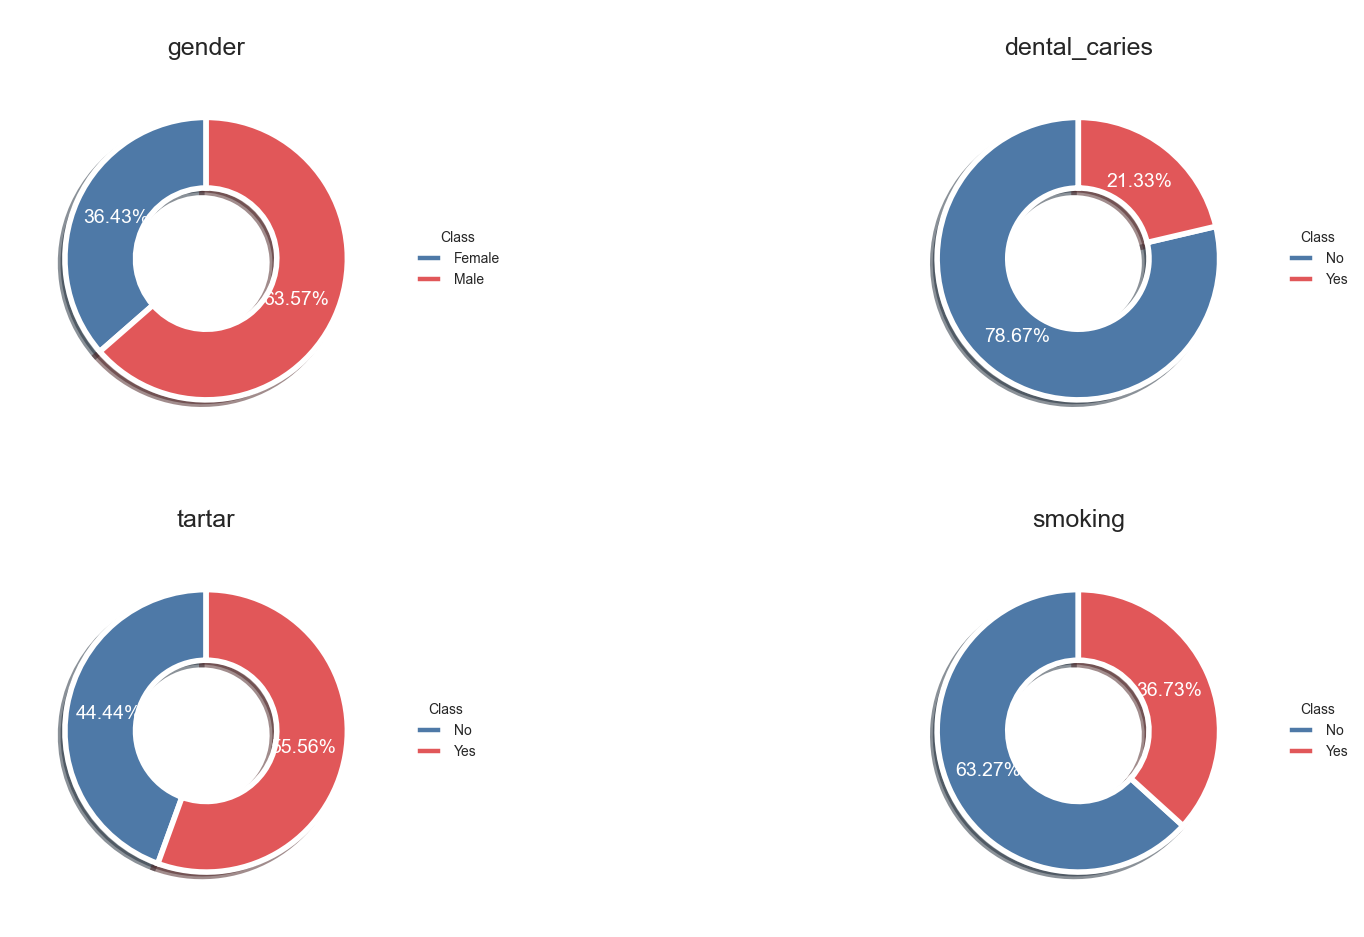

In [22]:
plot_binary_pie_charts(cat_columns, df)

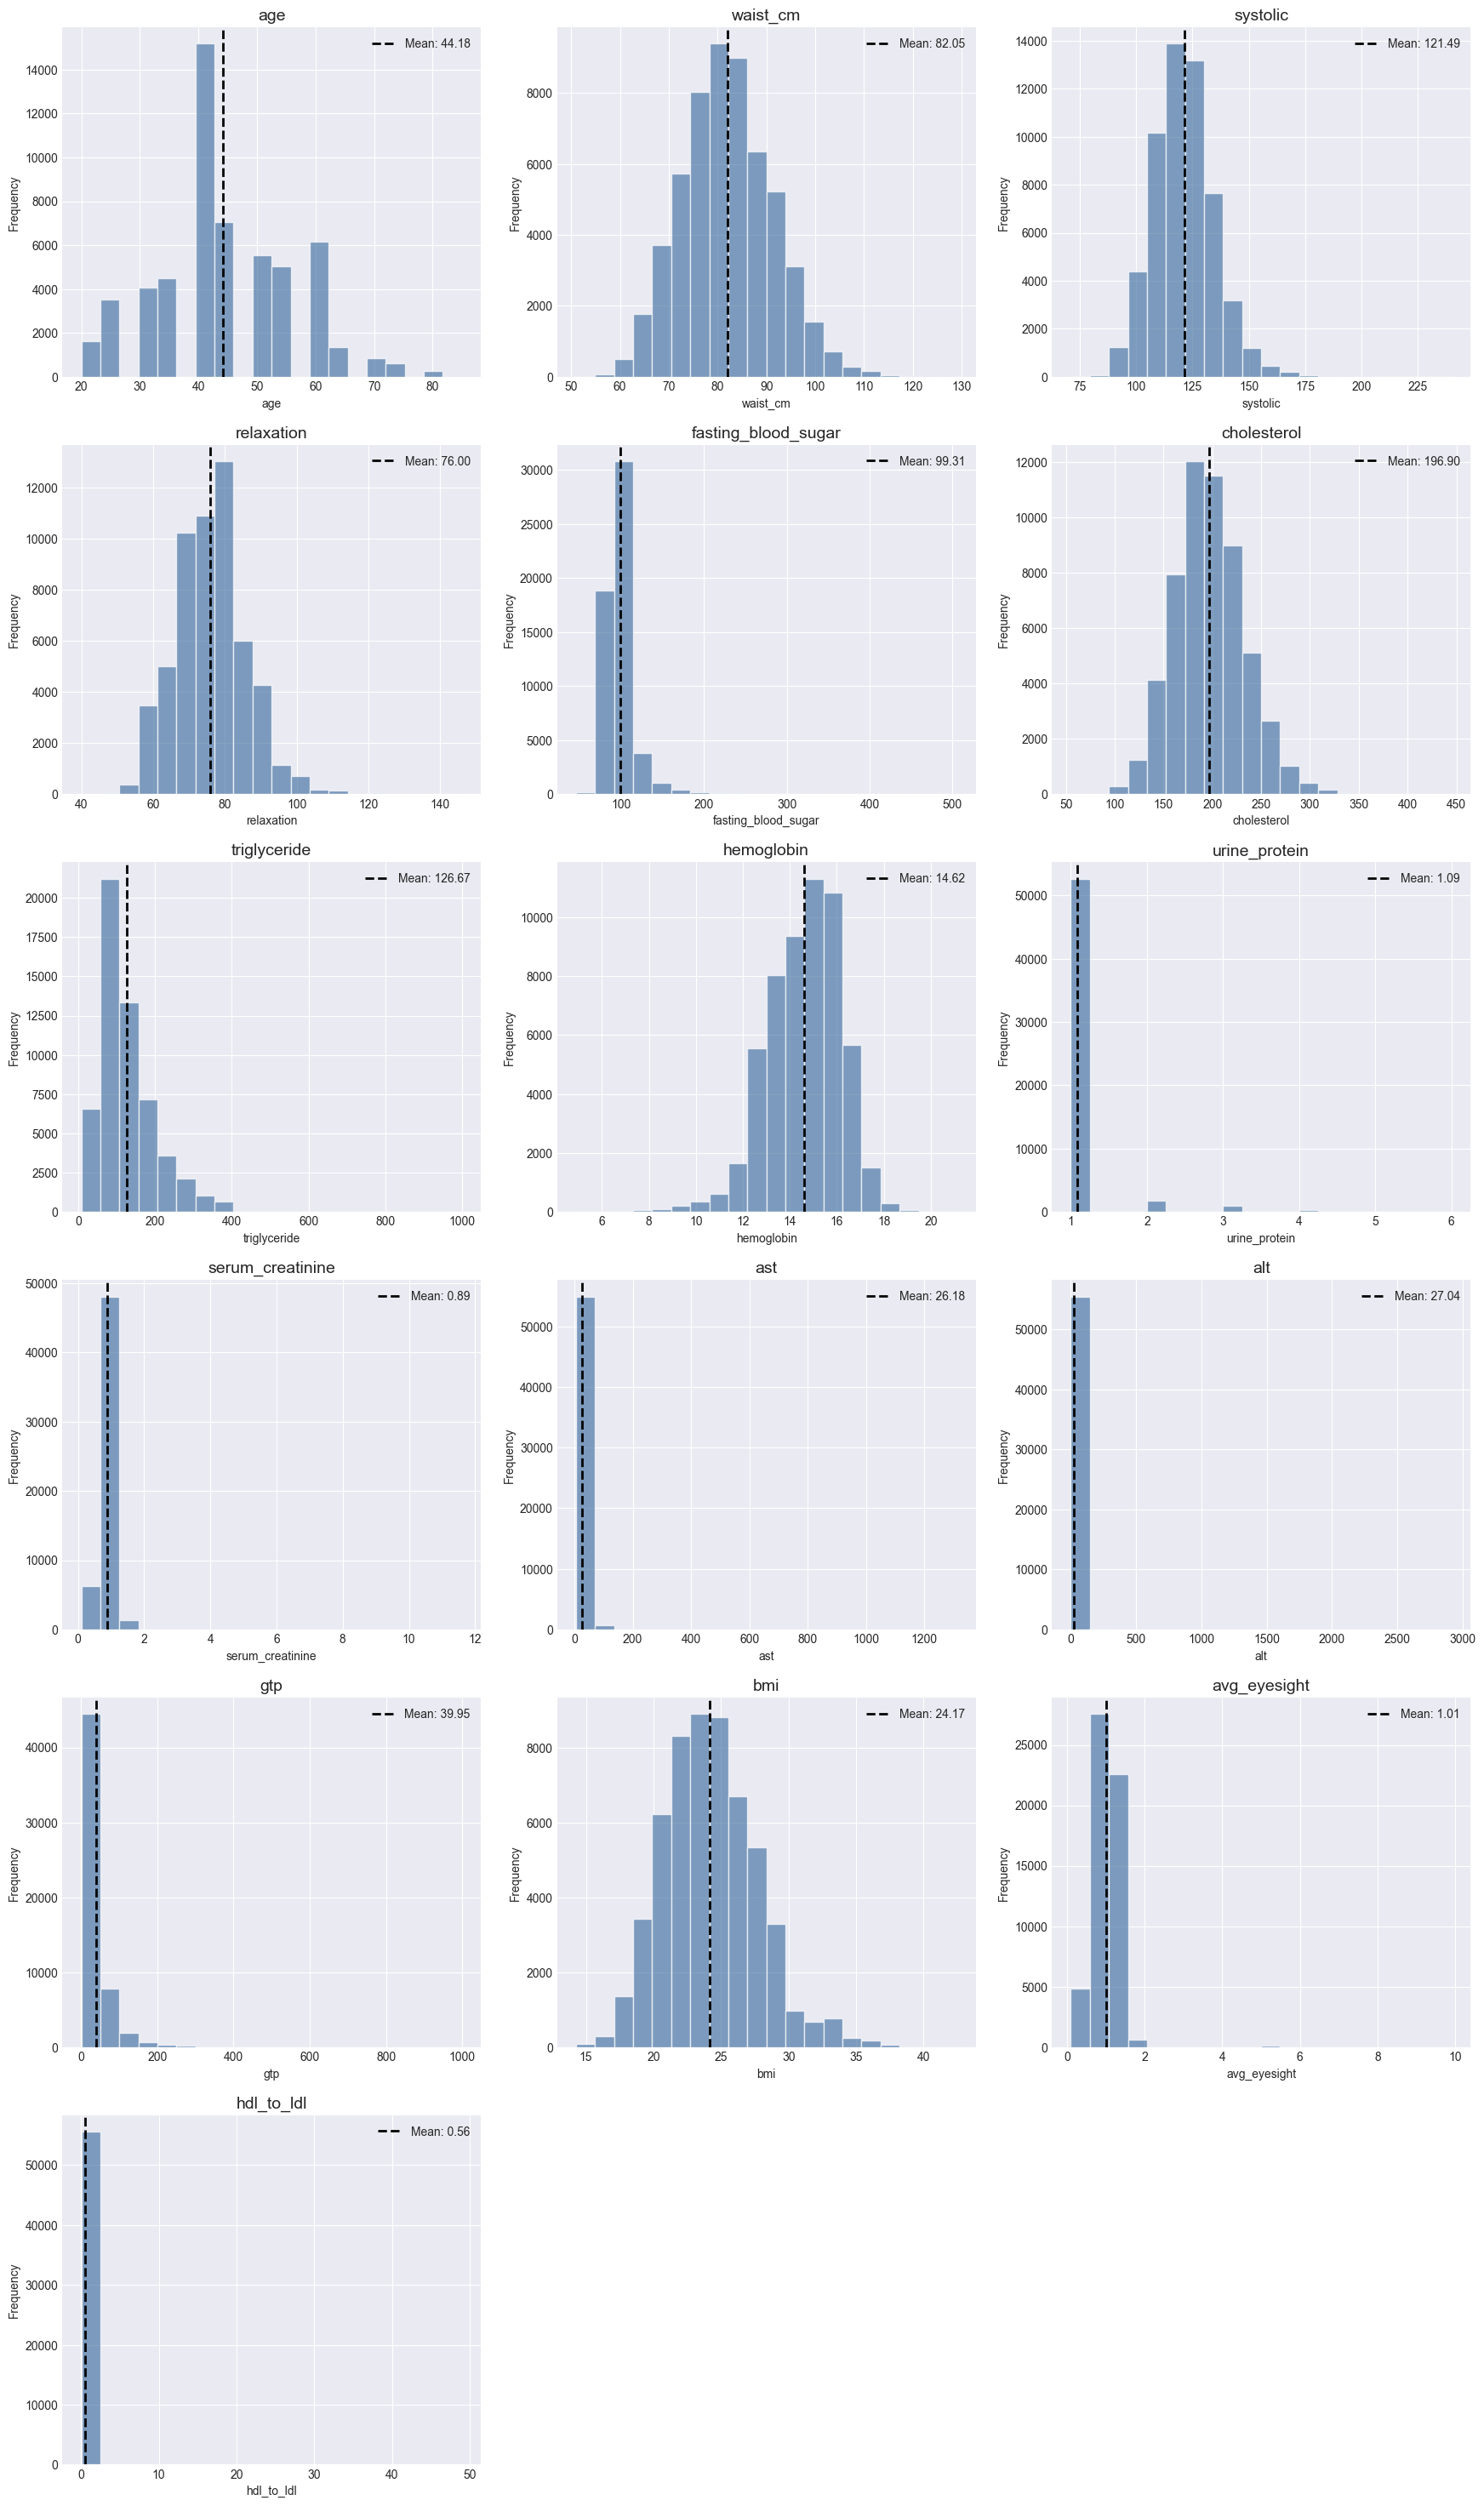

In [23]:
plot_histogram(numeric_cols, df)

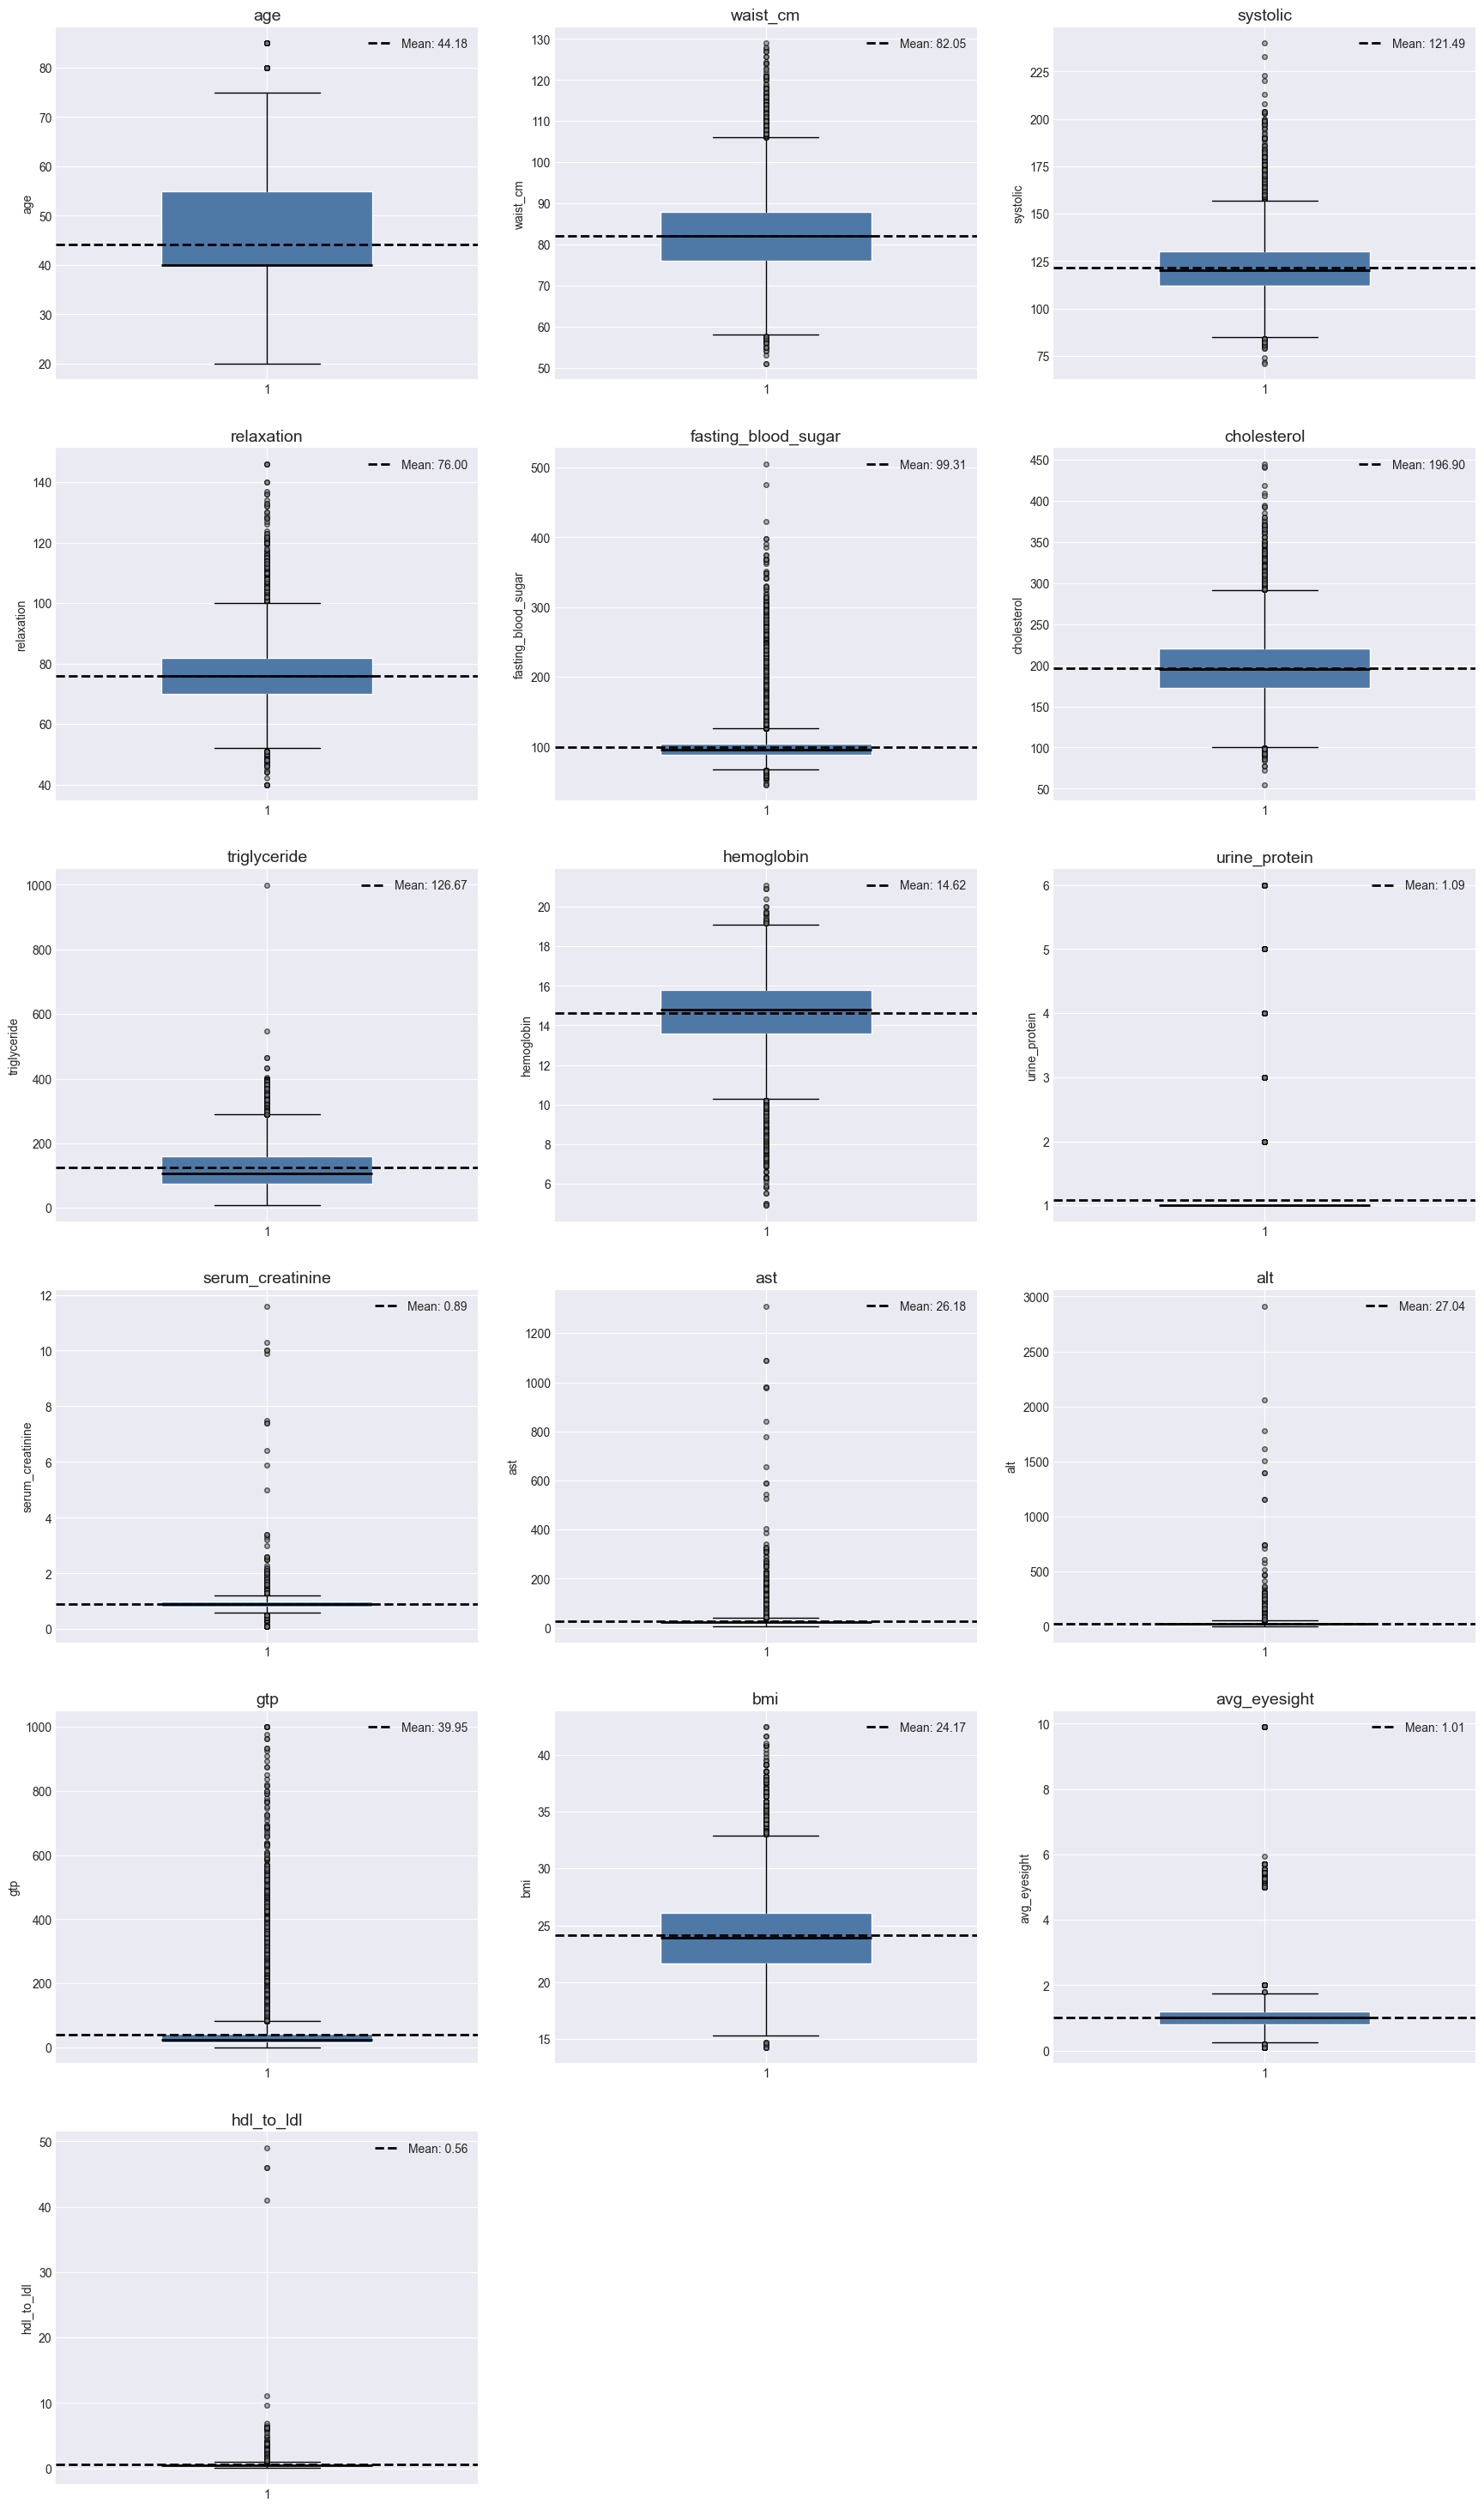

In [24]:
plot_boxplot(numeric_cols, df)

Original shapes:

(55692, 20)
Without outliers:

(32636, 20)


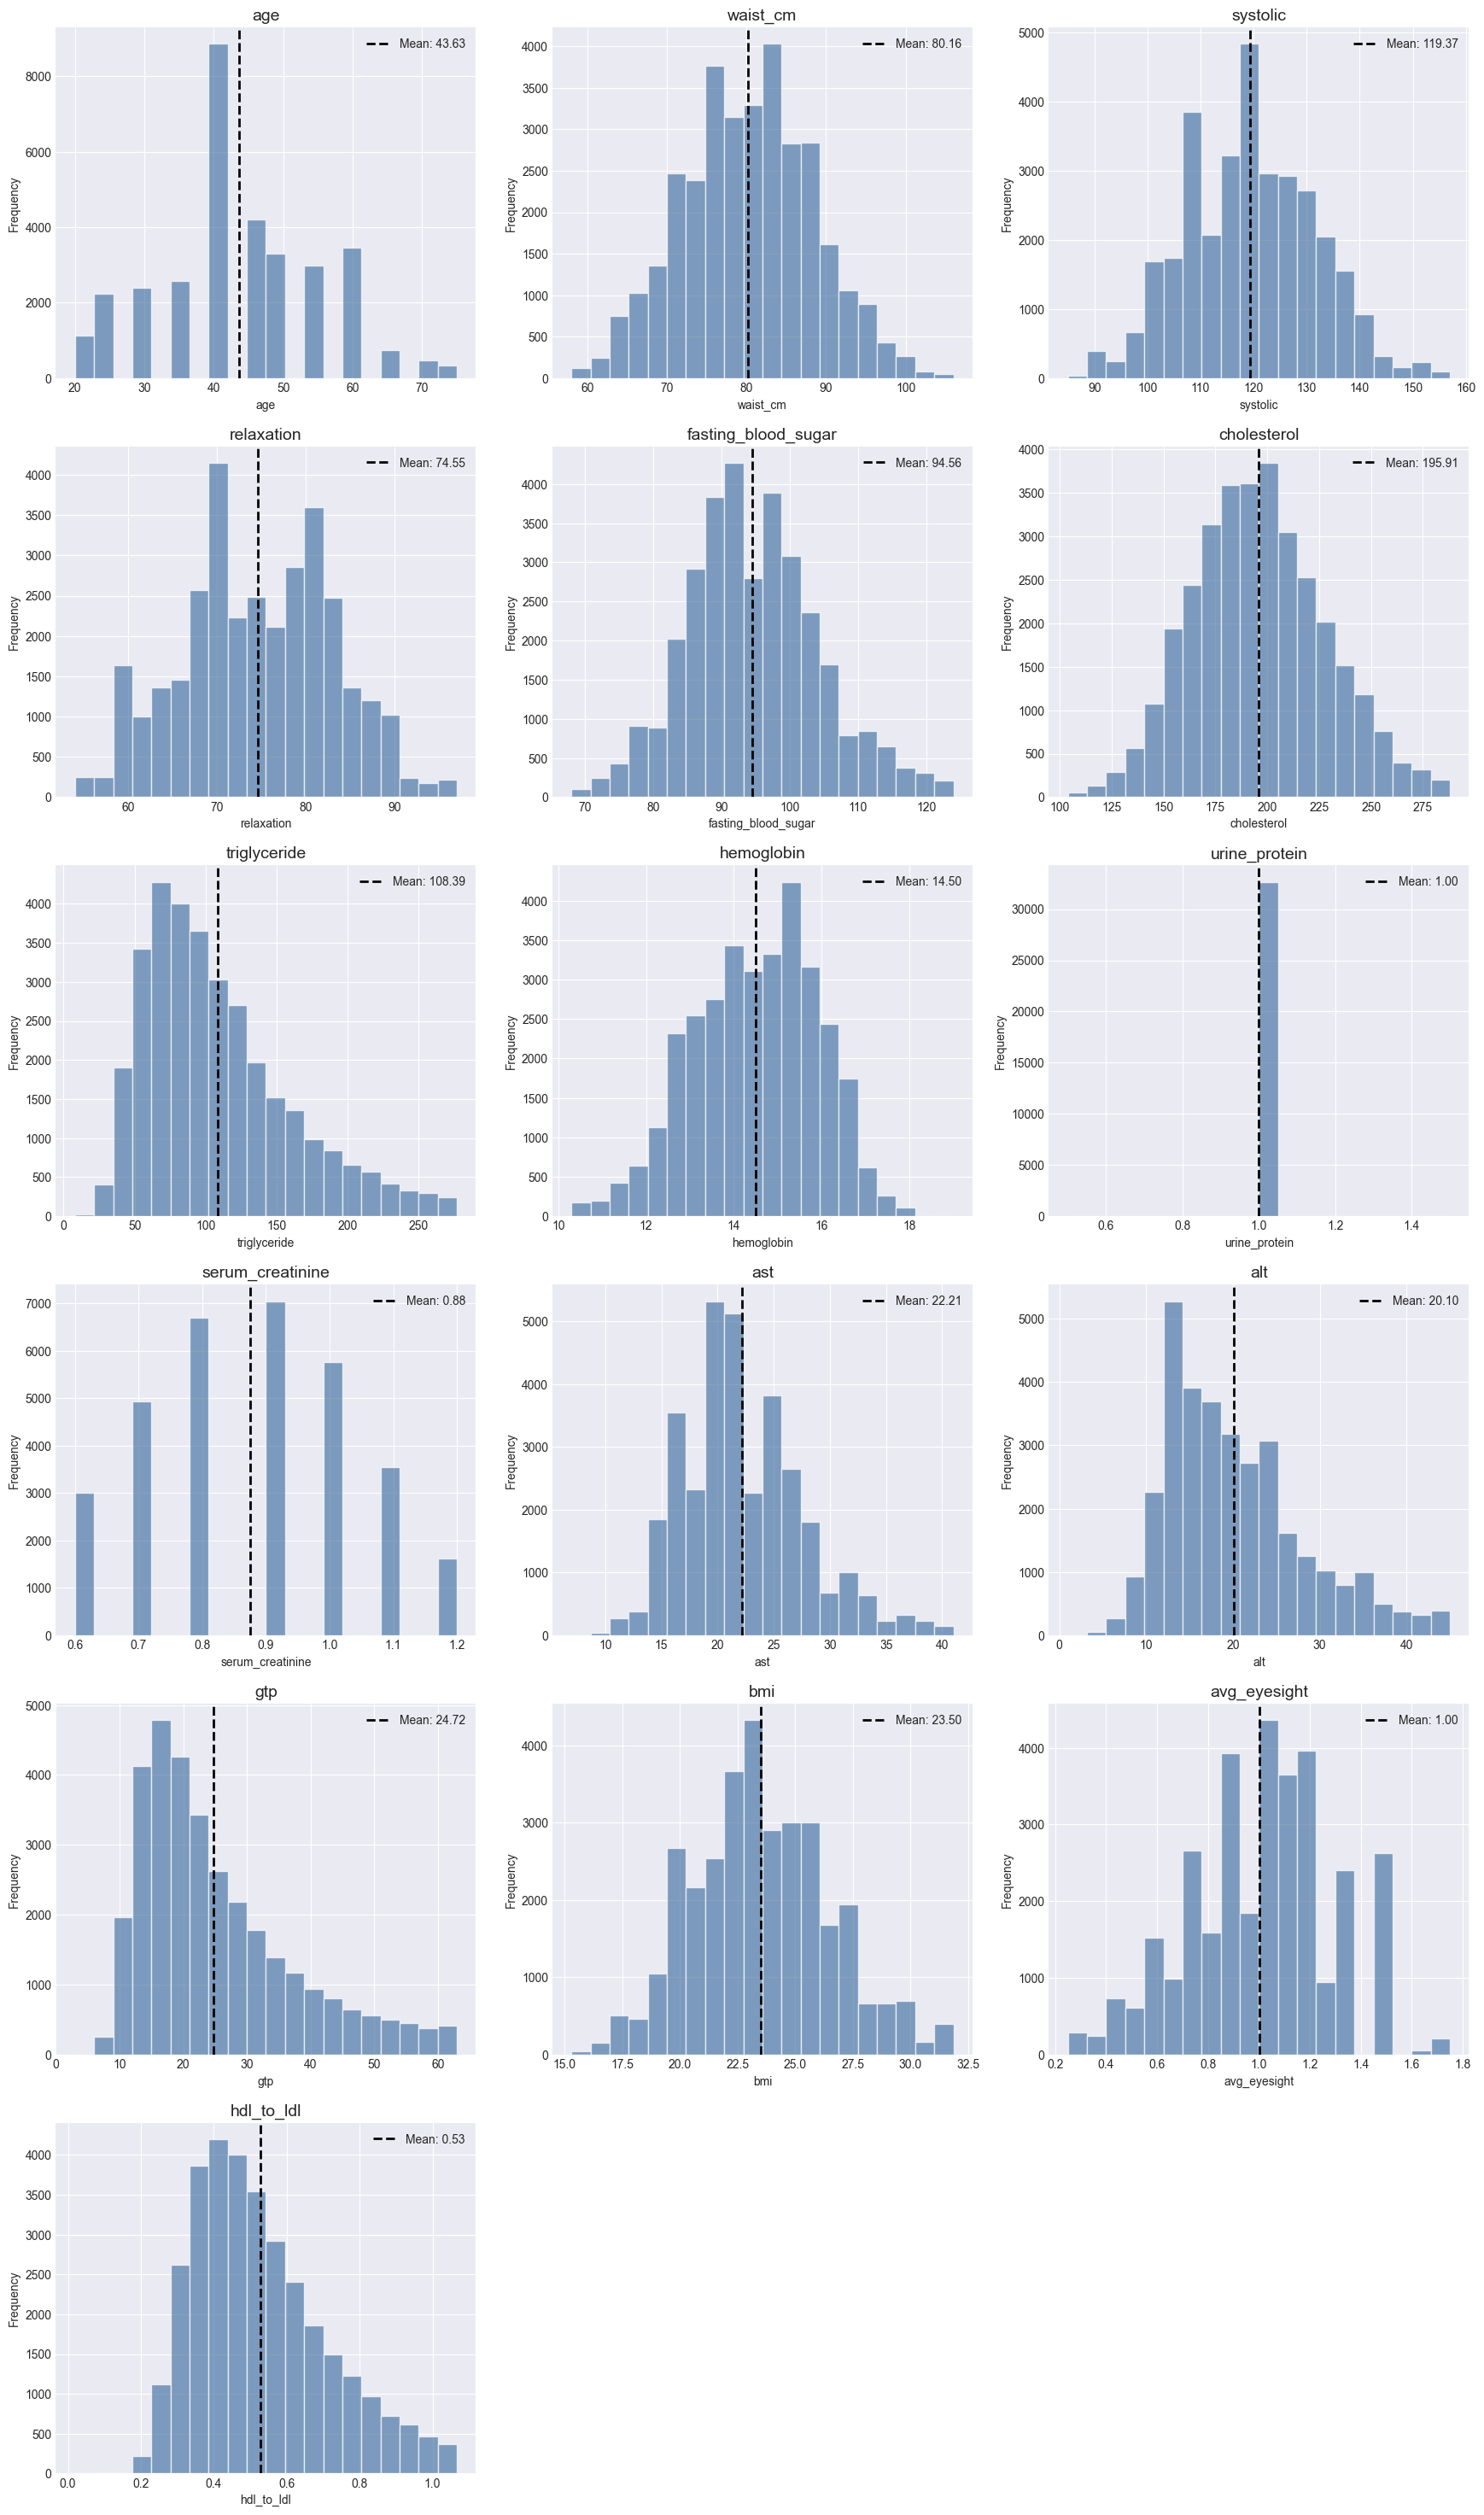

In [25]:
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

plot_histogram(numeric_cols, df_no_outliers)

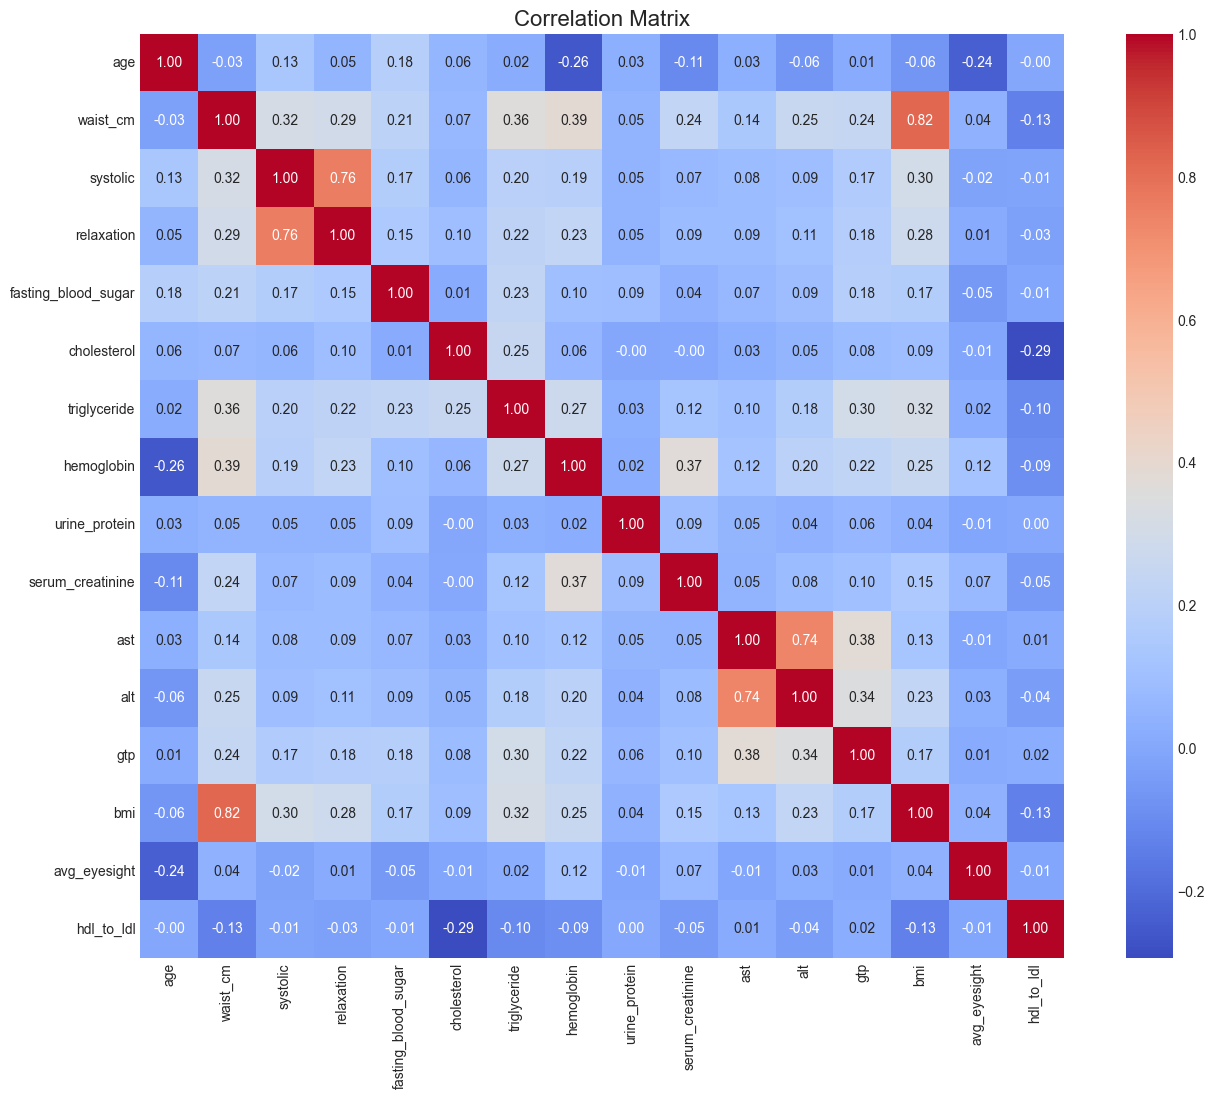

In [26]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Group-Based Analysis
</p>

**Smoking-Based Analysis (Non-Smoker vs Smoker)**

In [27]:
smoking_0 = df[df["smoking"] == "No"]
smoking_1 = df[df["smoking"] == "Yes"]


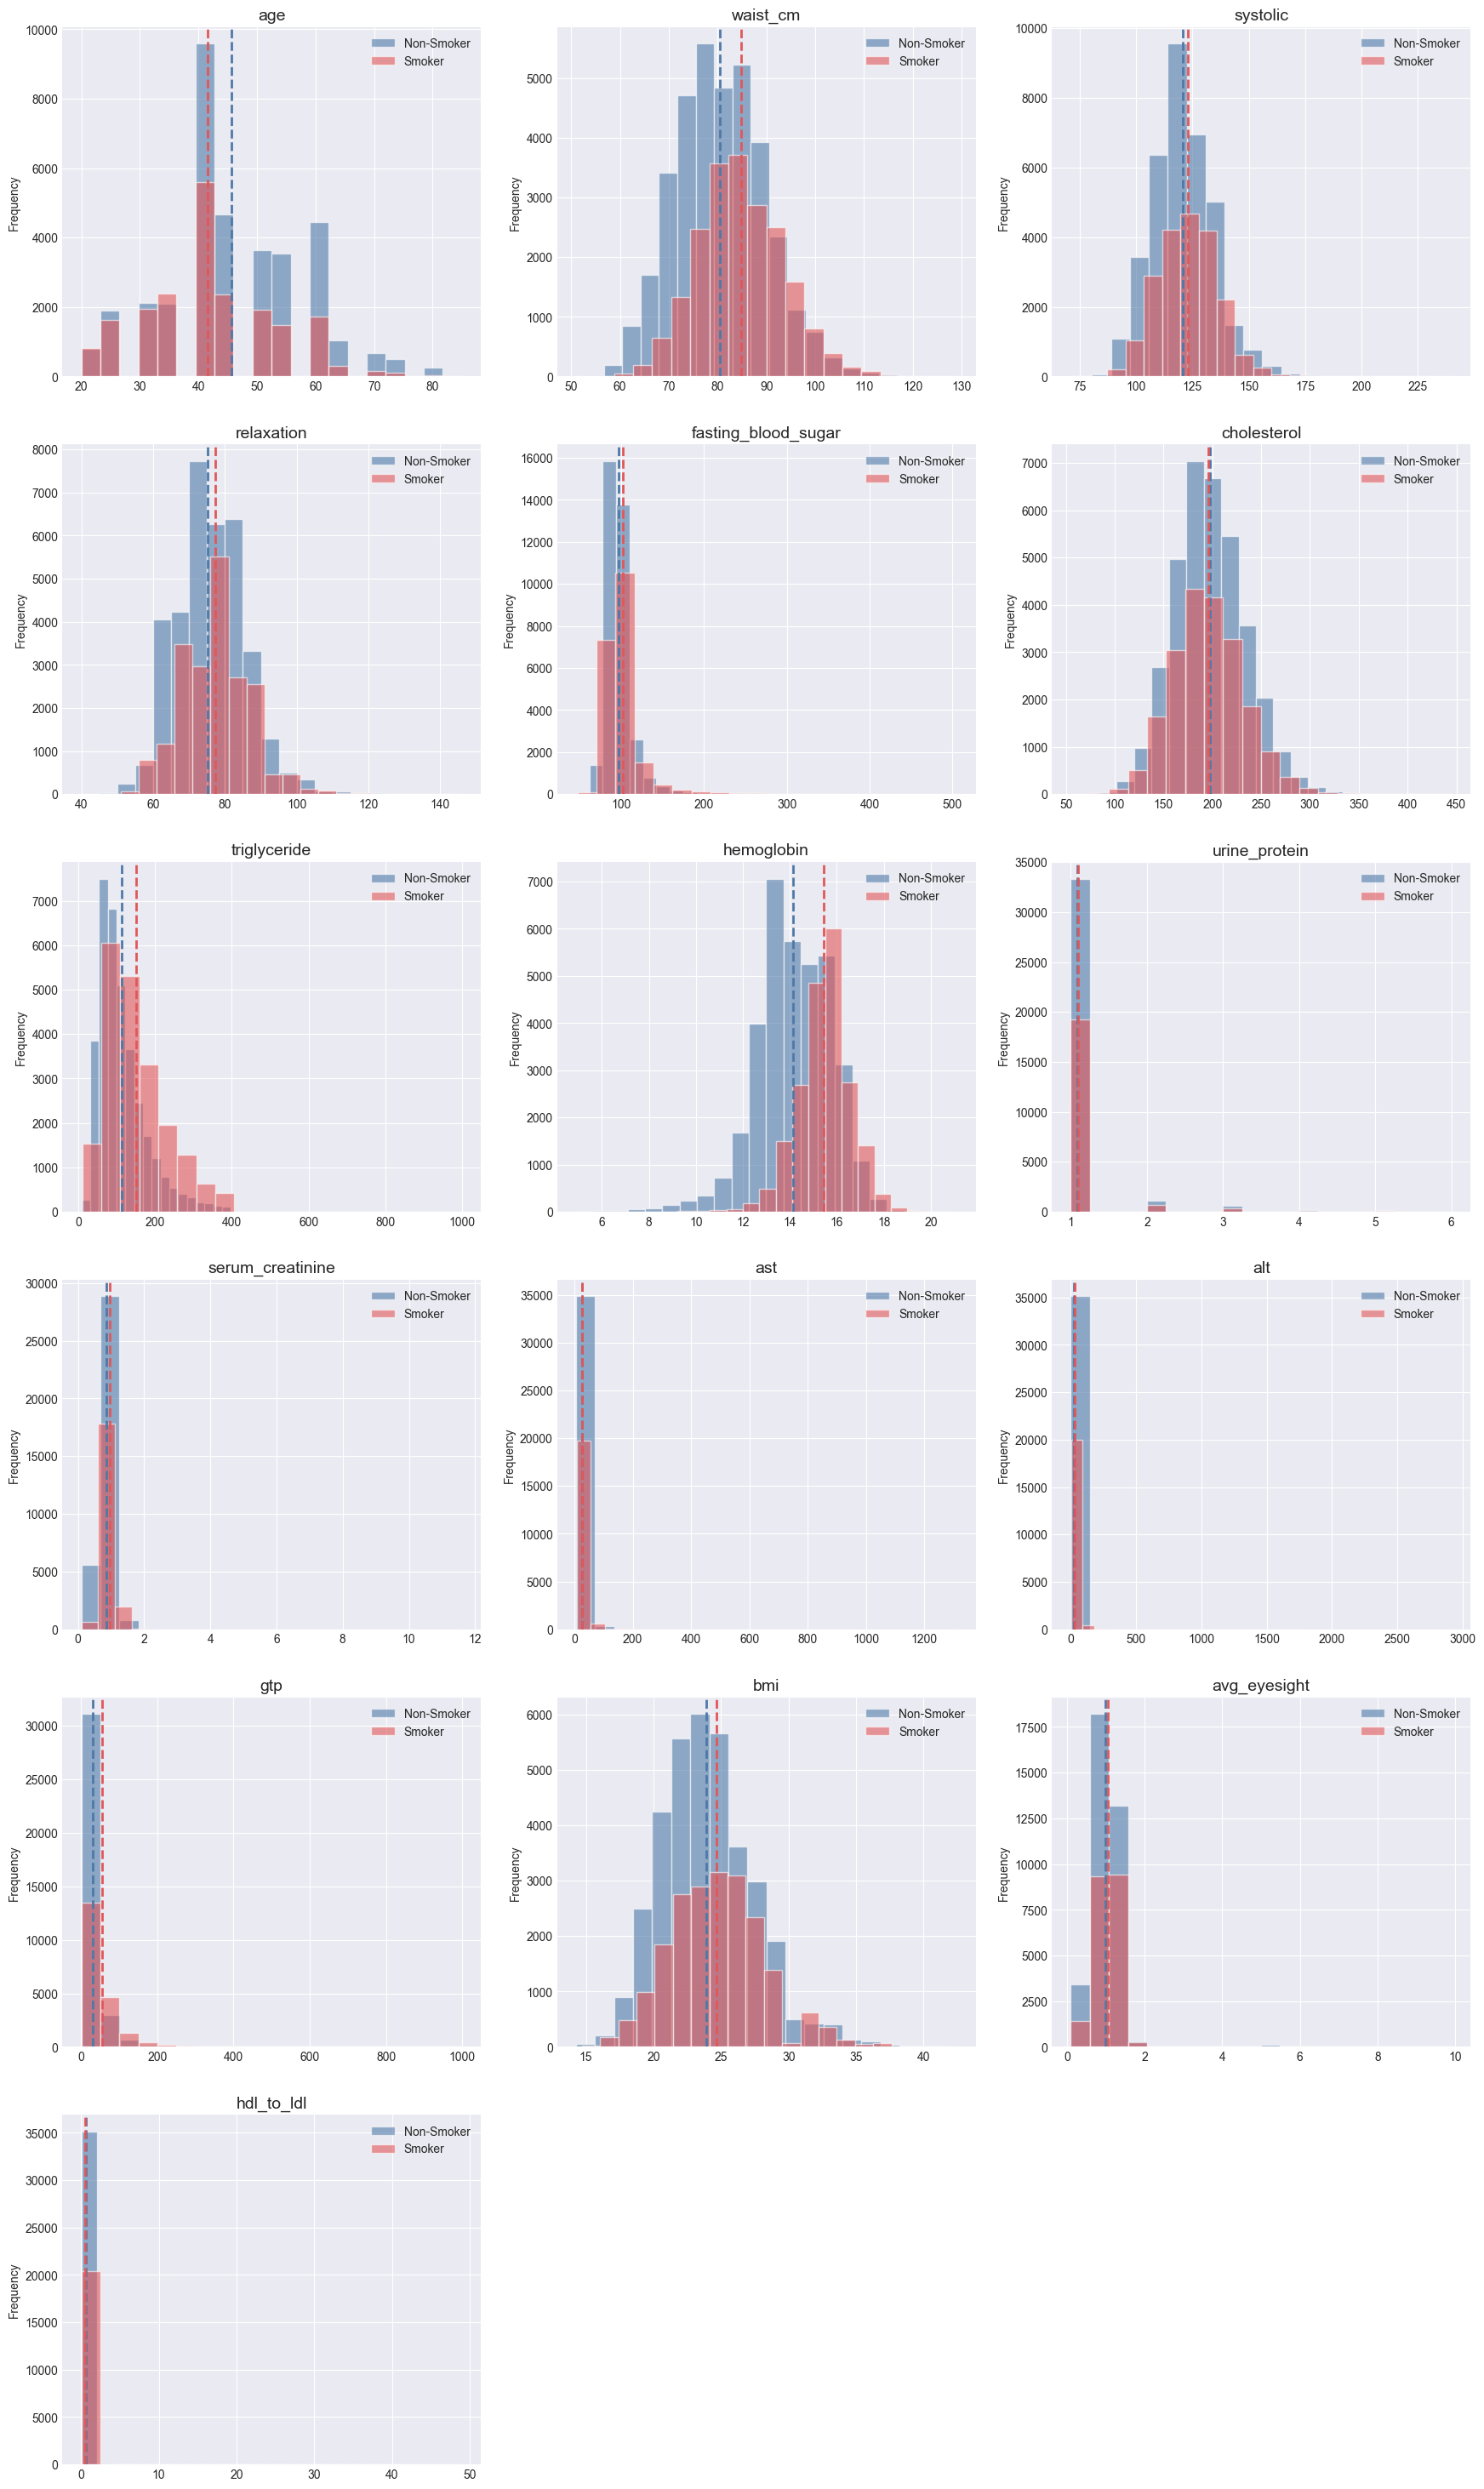

In [28]:
plot_comparison_histogram_style(numeric_cols, smoking_0, "Non-Smoker", smoking_1,"Smoker")

In [29]:
smoking_0_no_out = remove_outliers_iqr(smoking_0, numeric_cols)
smoking_1_no_out = remove_outliers_iqr(smoking_1, numeric_cols)

Original shapes:

(35237, 20)
Without outliers:

(21971, 20)
Original shapes:

(20455, 20)
Without outliers:

(12323, 20)


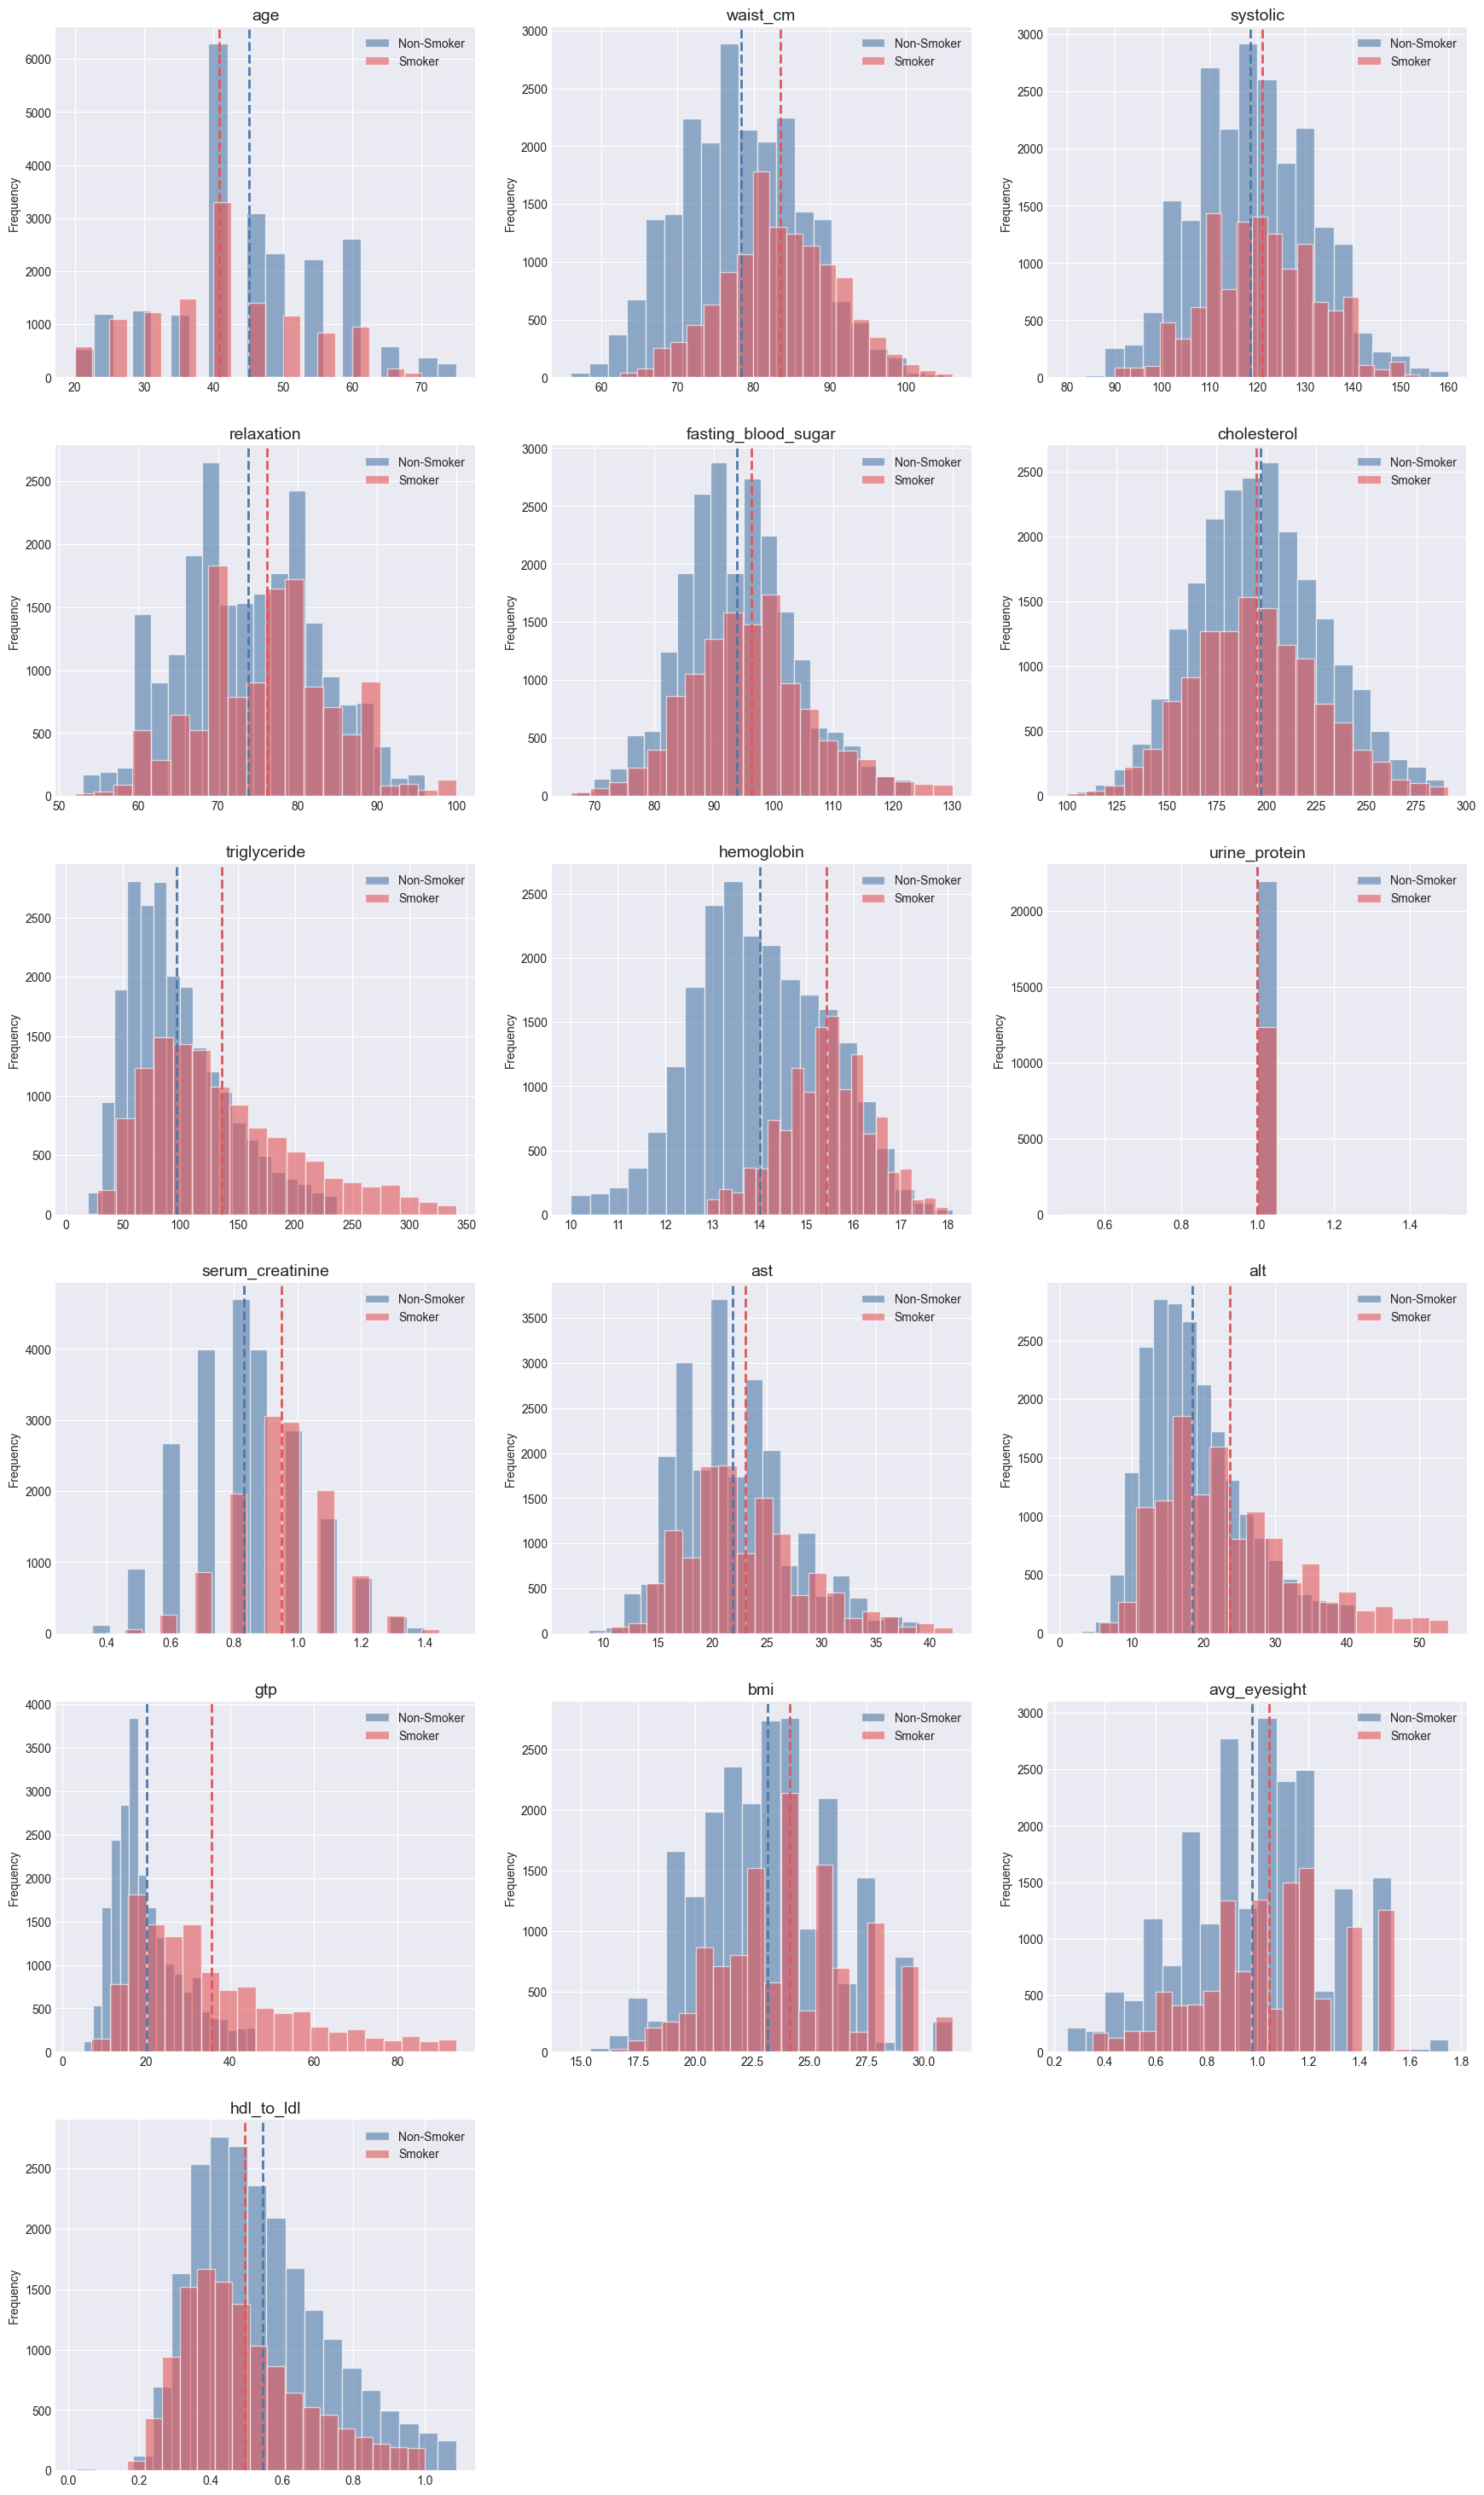

In [30]:
plot_comparison_histogram_style(numeric_cols, smoking_0_no_out,"Non-Smoker", smoking_1_no_out,"Smoker")

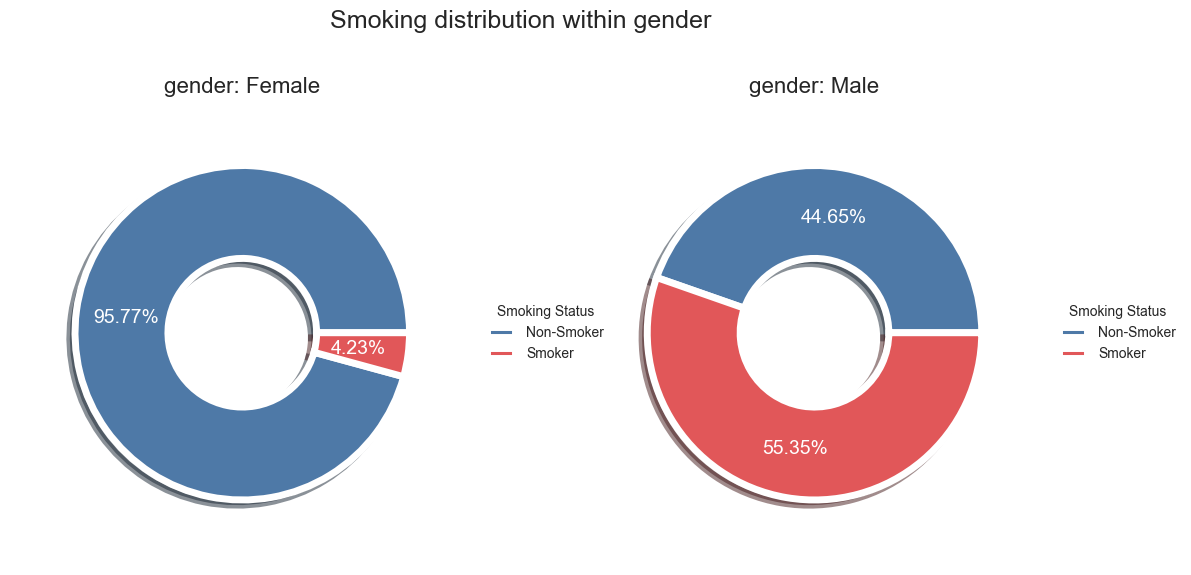

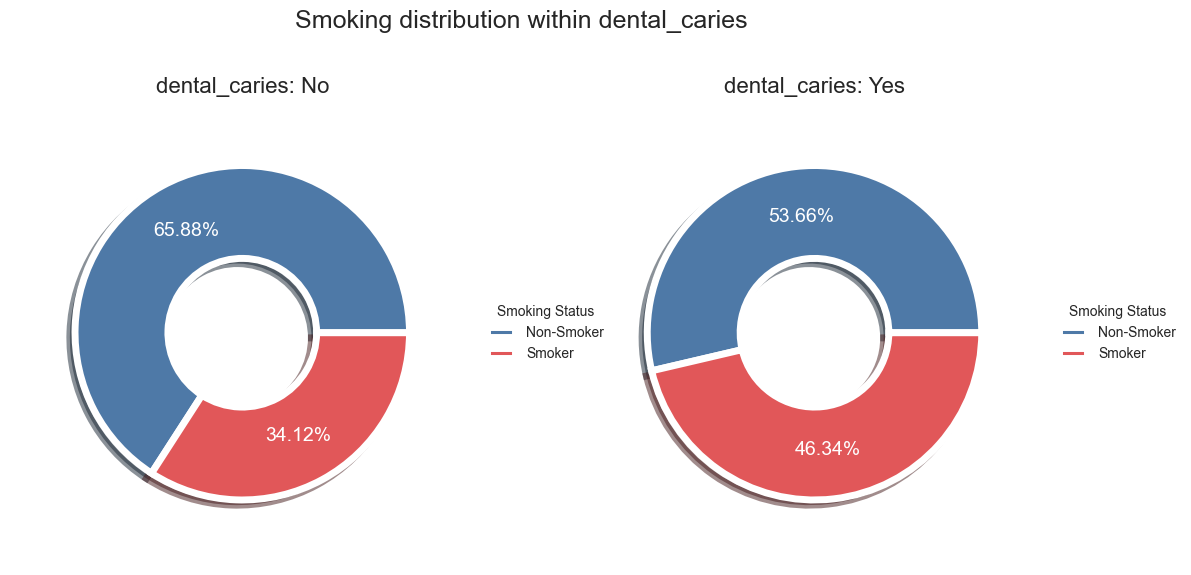

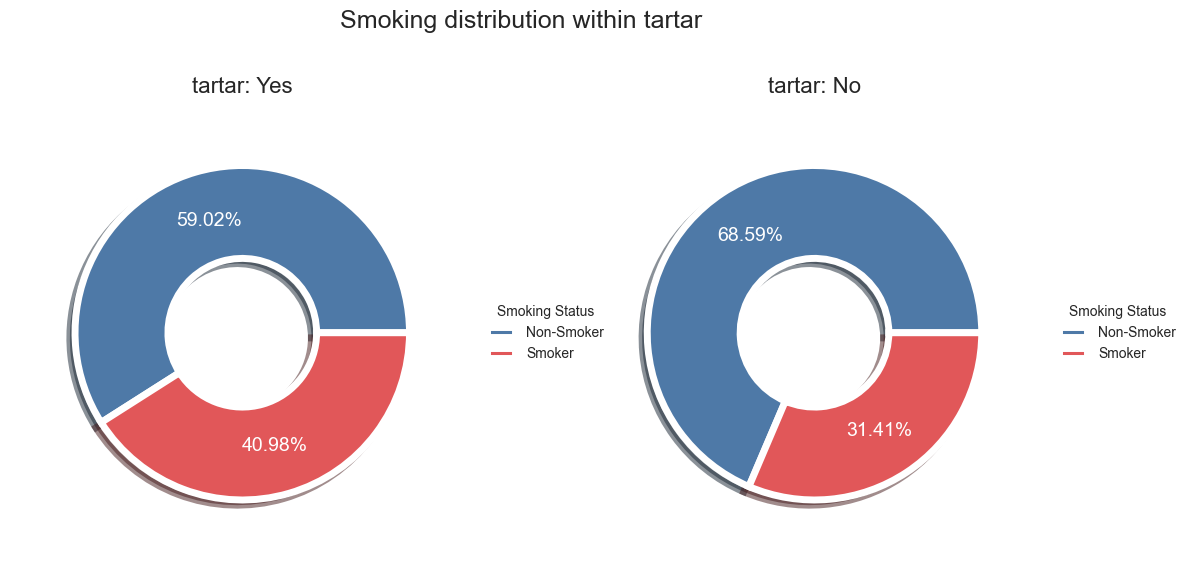

In [31]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in ["smoking"]]

for col in categorical_cols:

    categories = df[col].dropna().unique()
    n_cat = len(categories)

    fig, axs = plt.subplots(1, n_cat, figsize=(6 * n_cat, 6))
    if n_cat == 1:
        axs = [axs]

    plt.tight_layout(pad=4.0)

    for i, category in enumerate(categories):
        ax = axs[i]

        subset = df[df[col] == category]

        counts = subset["smoking"].value_counts().reindex(["No", "Yes"], fill_value=0)

        labels = ["Non-Smoker", "Smoker"]
        colors = ["#4e79a7", "#e15759"]

        ax.pie(
            counts.values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=0,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(color="white", size=14),
            wedgeprops=dict(width=0.5, edgecolor="white", linewidth=5)
        )

        ax.set_title(f"{col}: {category}", fontsize=16)

        ax.legend(
            labels,
            title="Smoking Status",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    plt.suptitle(
        f"Smoking distribution within {col}",
        fontsize=18,
        y=1.05
    )

    plt.show()


**Smoking-Male-Based Analysis (Male Non-Smoker vs Male Smoker)**

In [32]:
smoking_male = smoking_1[smoking_1["gender"] == "Male"]
no_smoking_male = smoking_0[smoking_0["gender"] == "Male"]

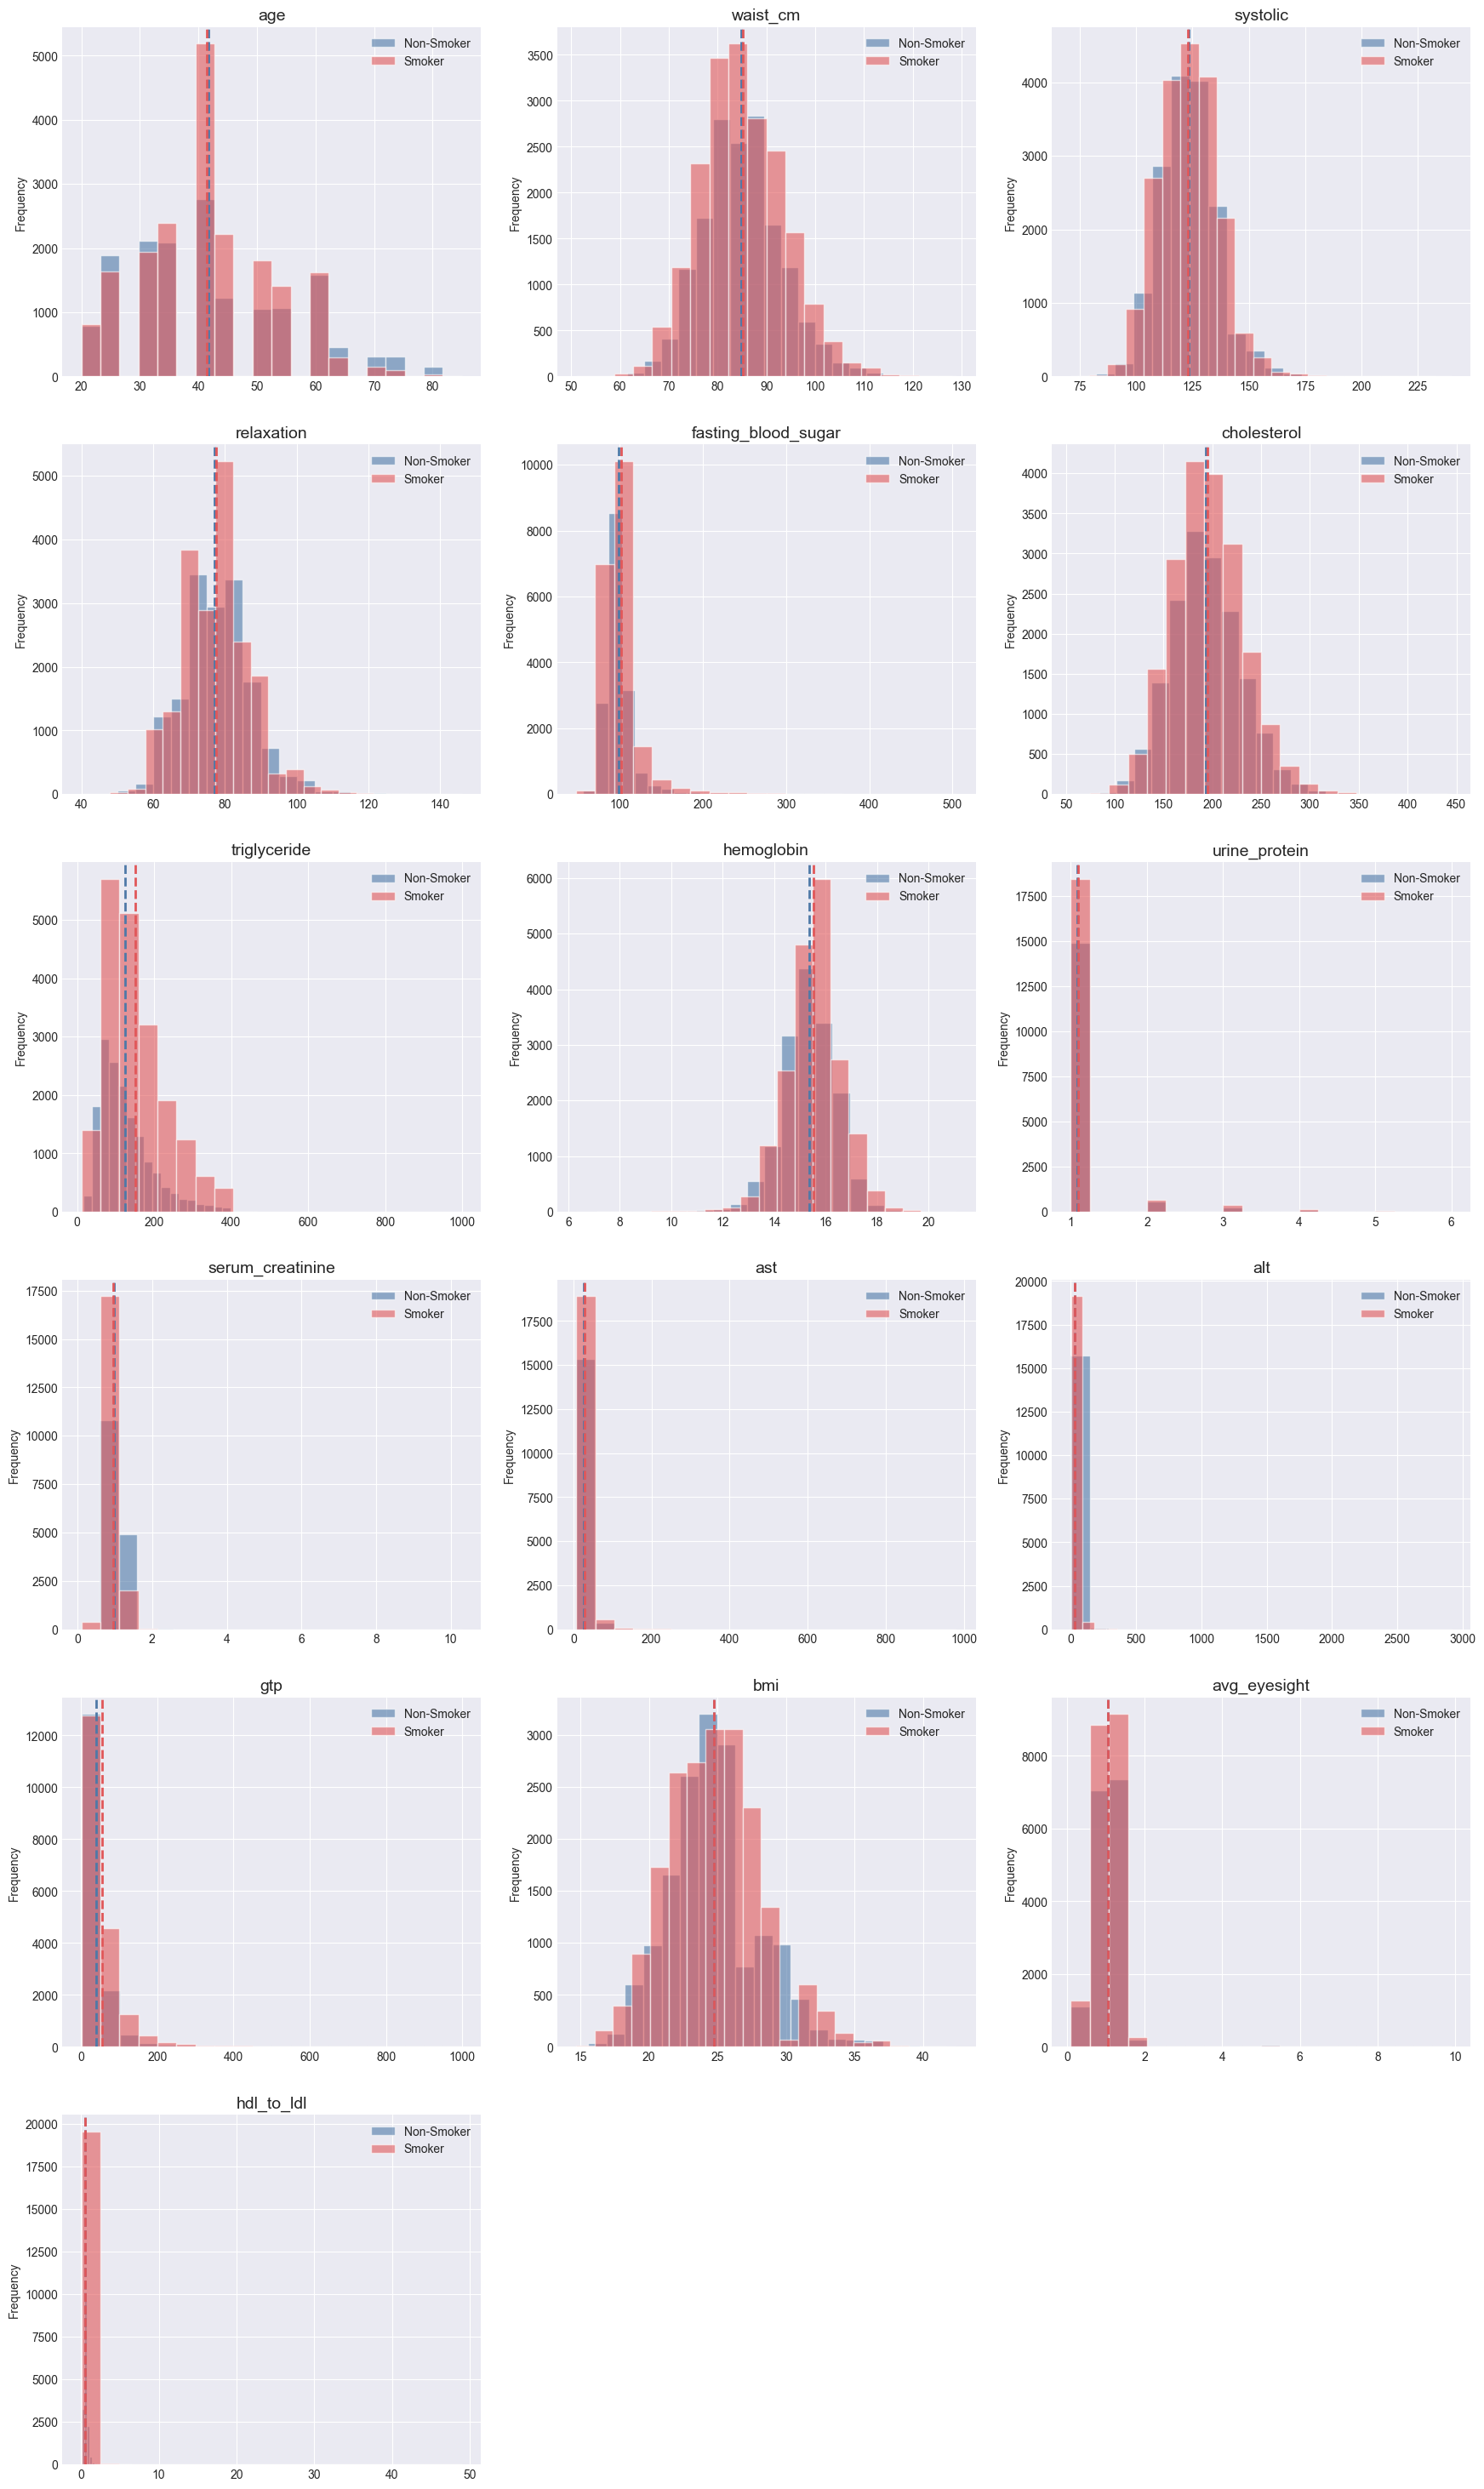

In [33]:
plot_comparison_histogram_style(numeric_cols,no_smoking_male,"Non-Smoker",smoking_male,"Smoker")

In [34]:
smoking_male_ou = remove_outliers_iqr(smoking_male,numeric_cols)
no_smoking_male_ou = remove_outliers_iqr(no_smoking_male,numeric_cols)

Original shapes:

(19596, 20)
Without outliers:

(11917, 20)
Original shapes:

(15805, 20)
Without outliers:

(9710, 20)


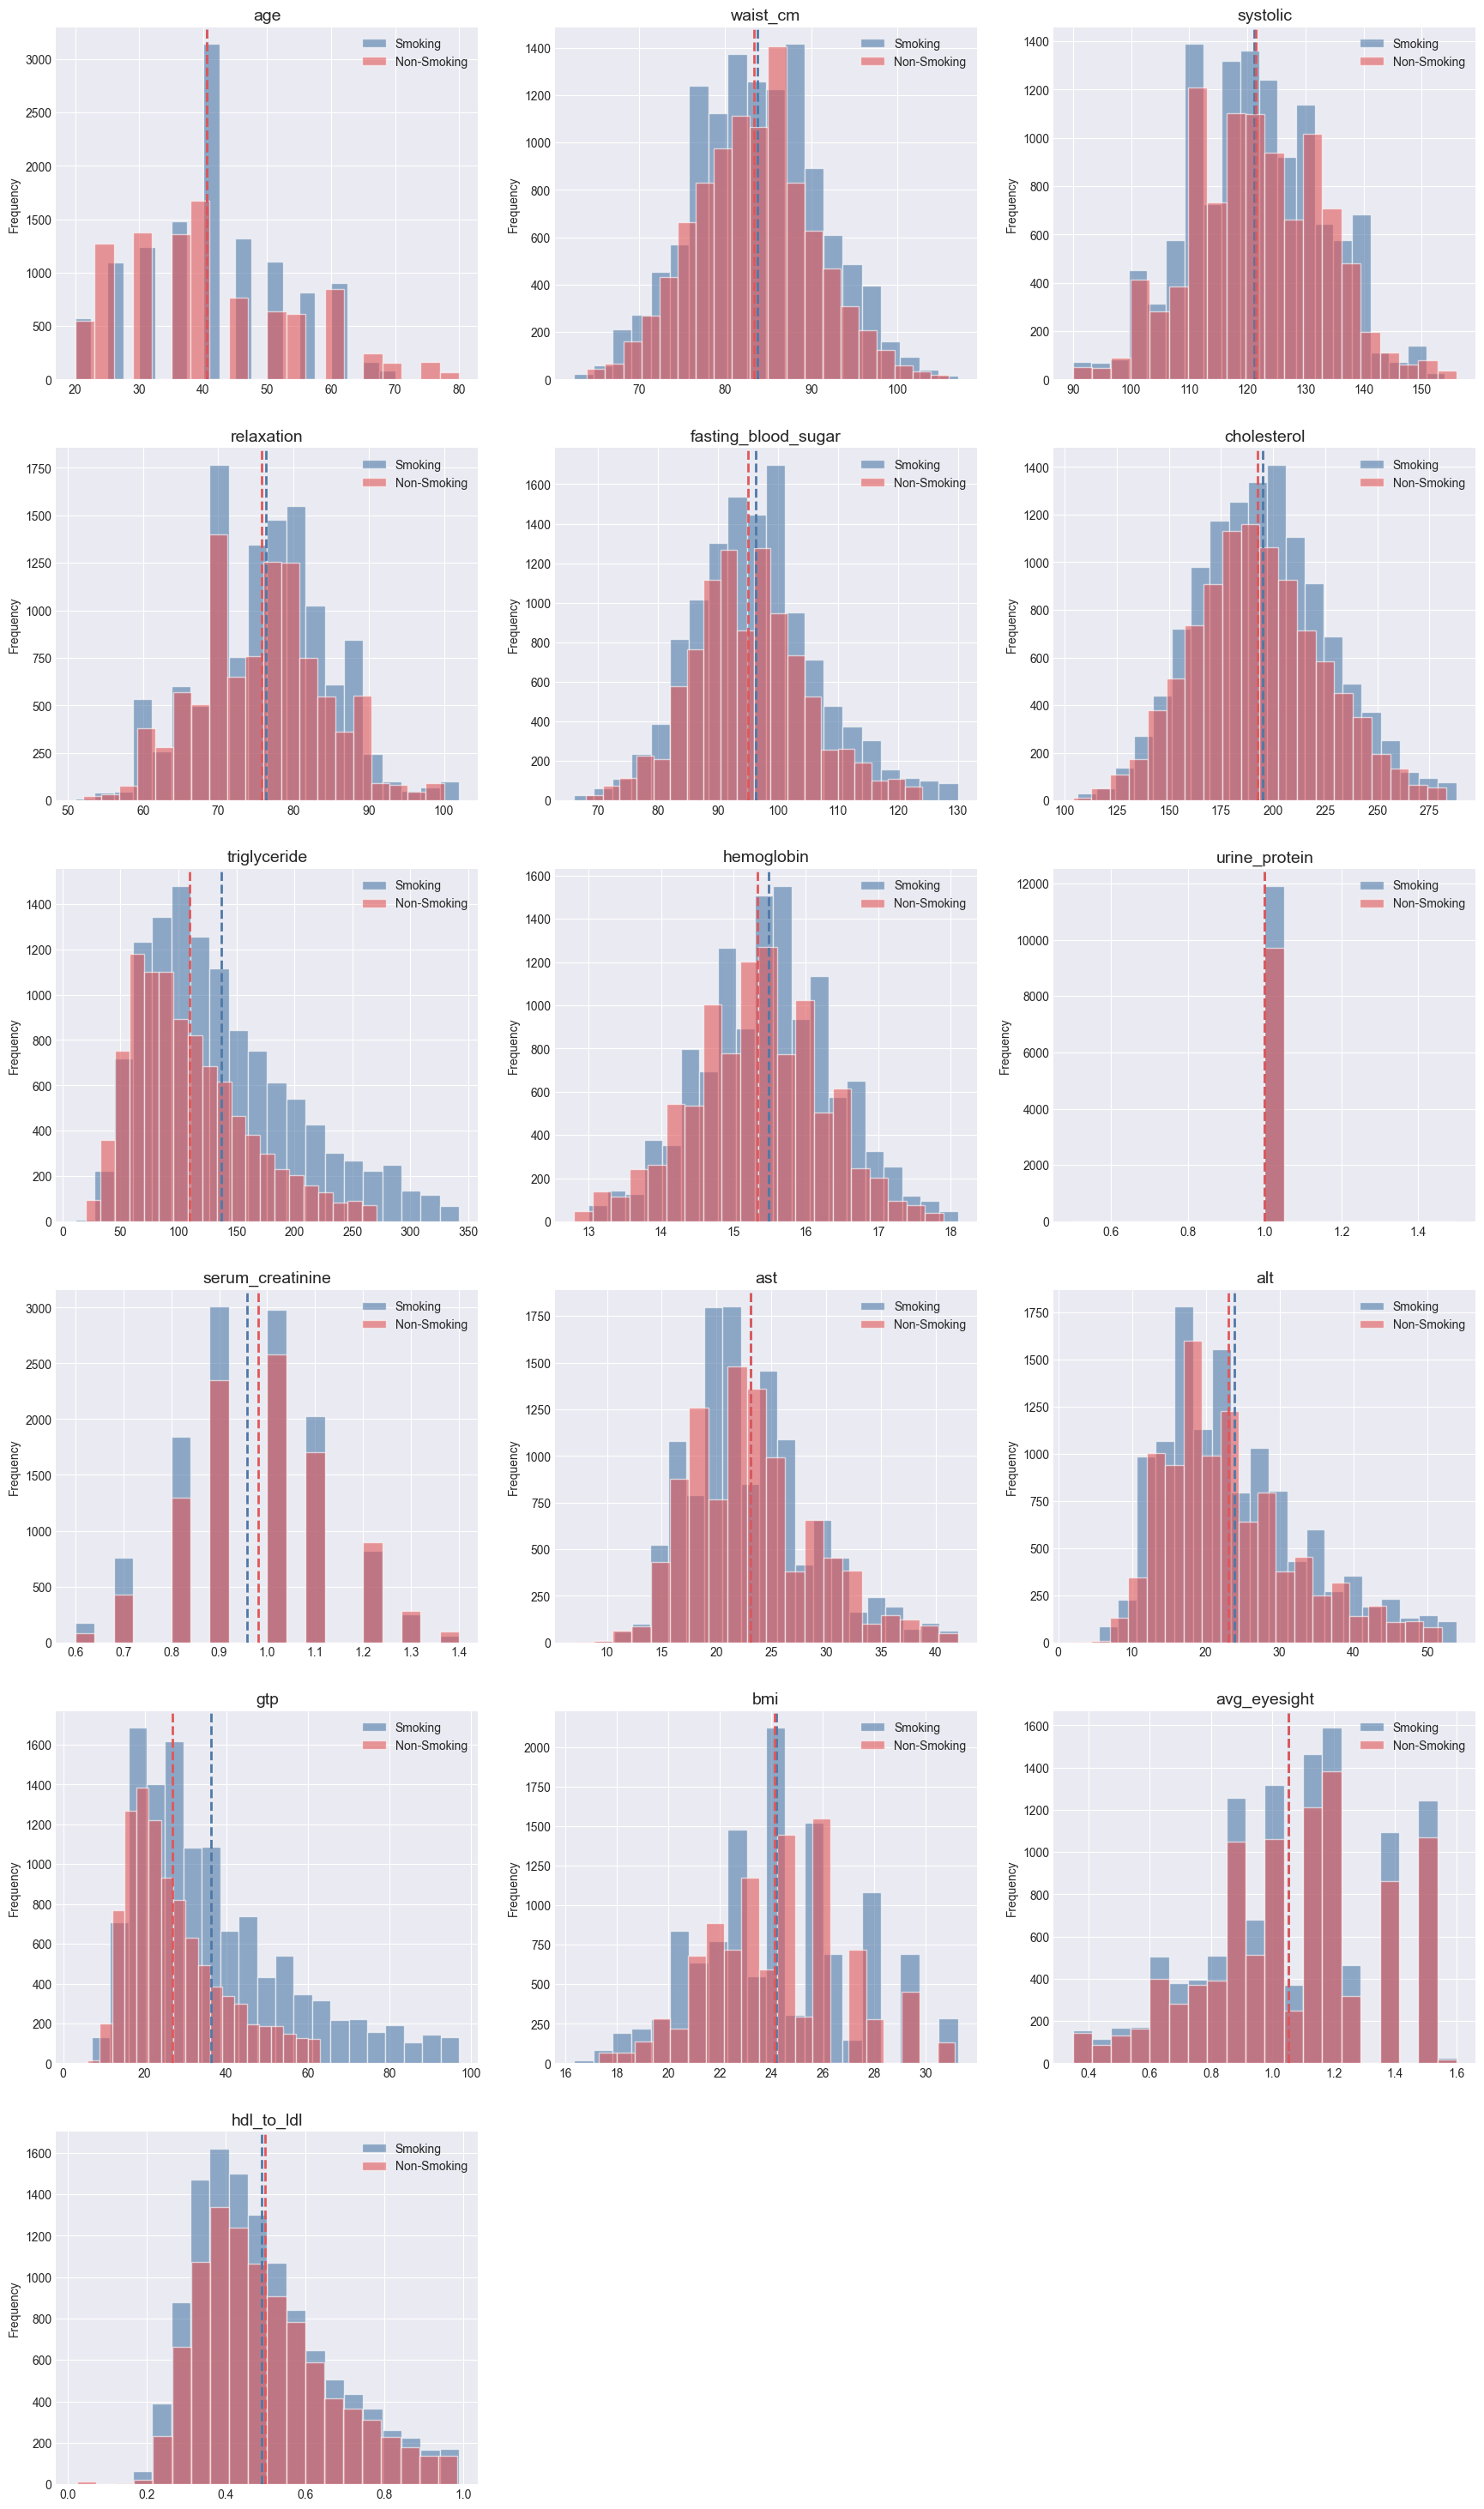

In [35]:
plot_comparison_histogram_style(numeric_cols,smoking_male_ou,"Smoking",no_smoking_male_ou,"Non-Smoking")

**Gender-Based Analysis (Male vs Female)**

In [36]:
male = df[df["gender"] == "Male"]
female = df[df["gender"] == "Female"]

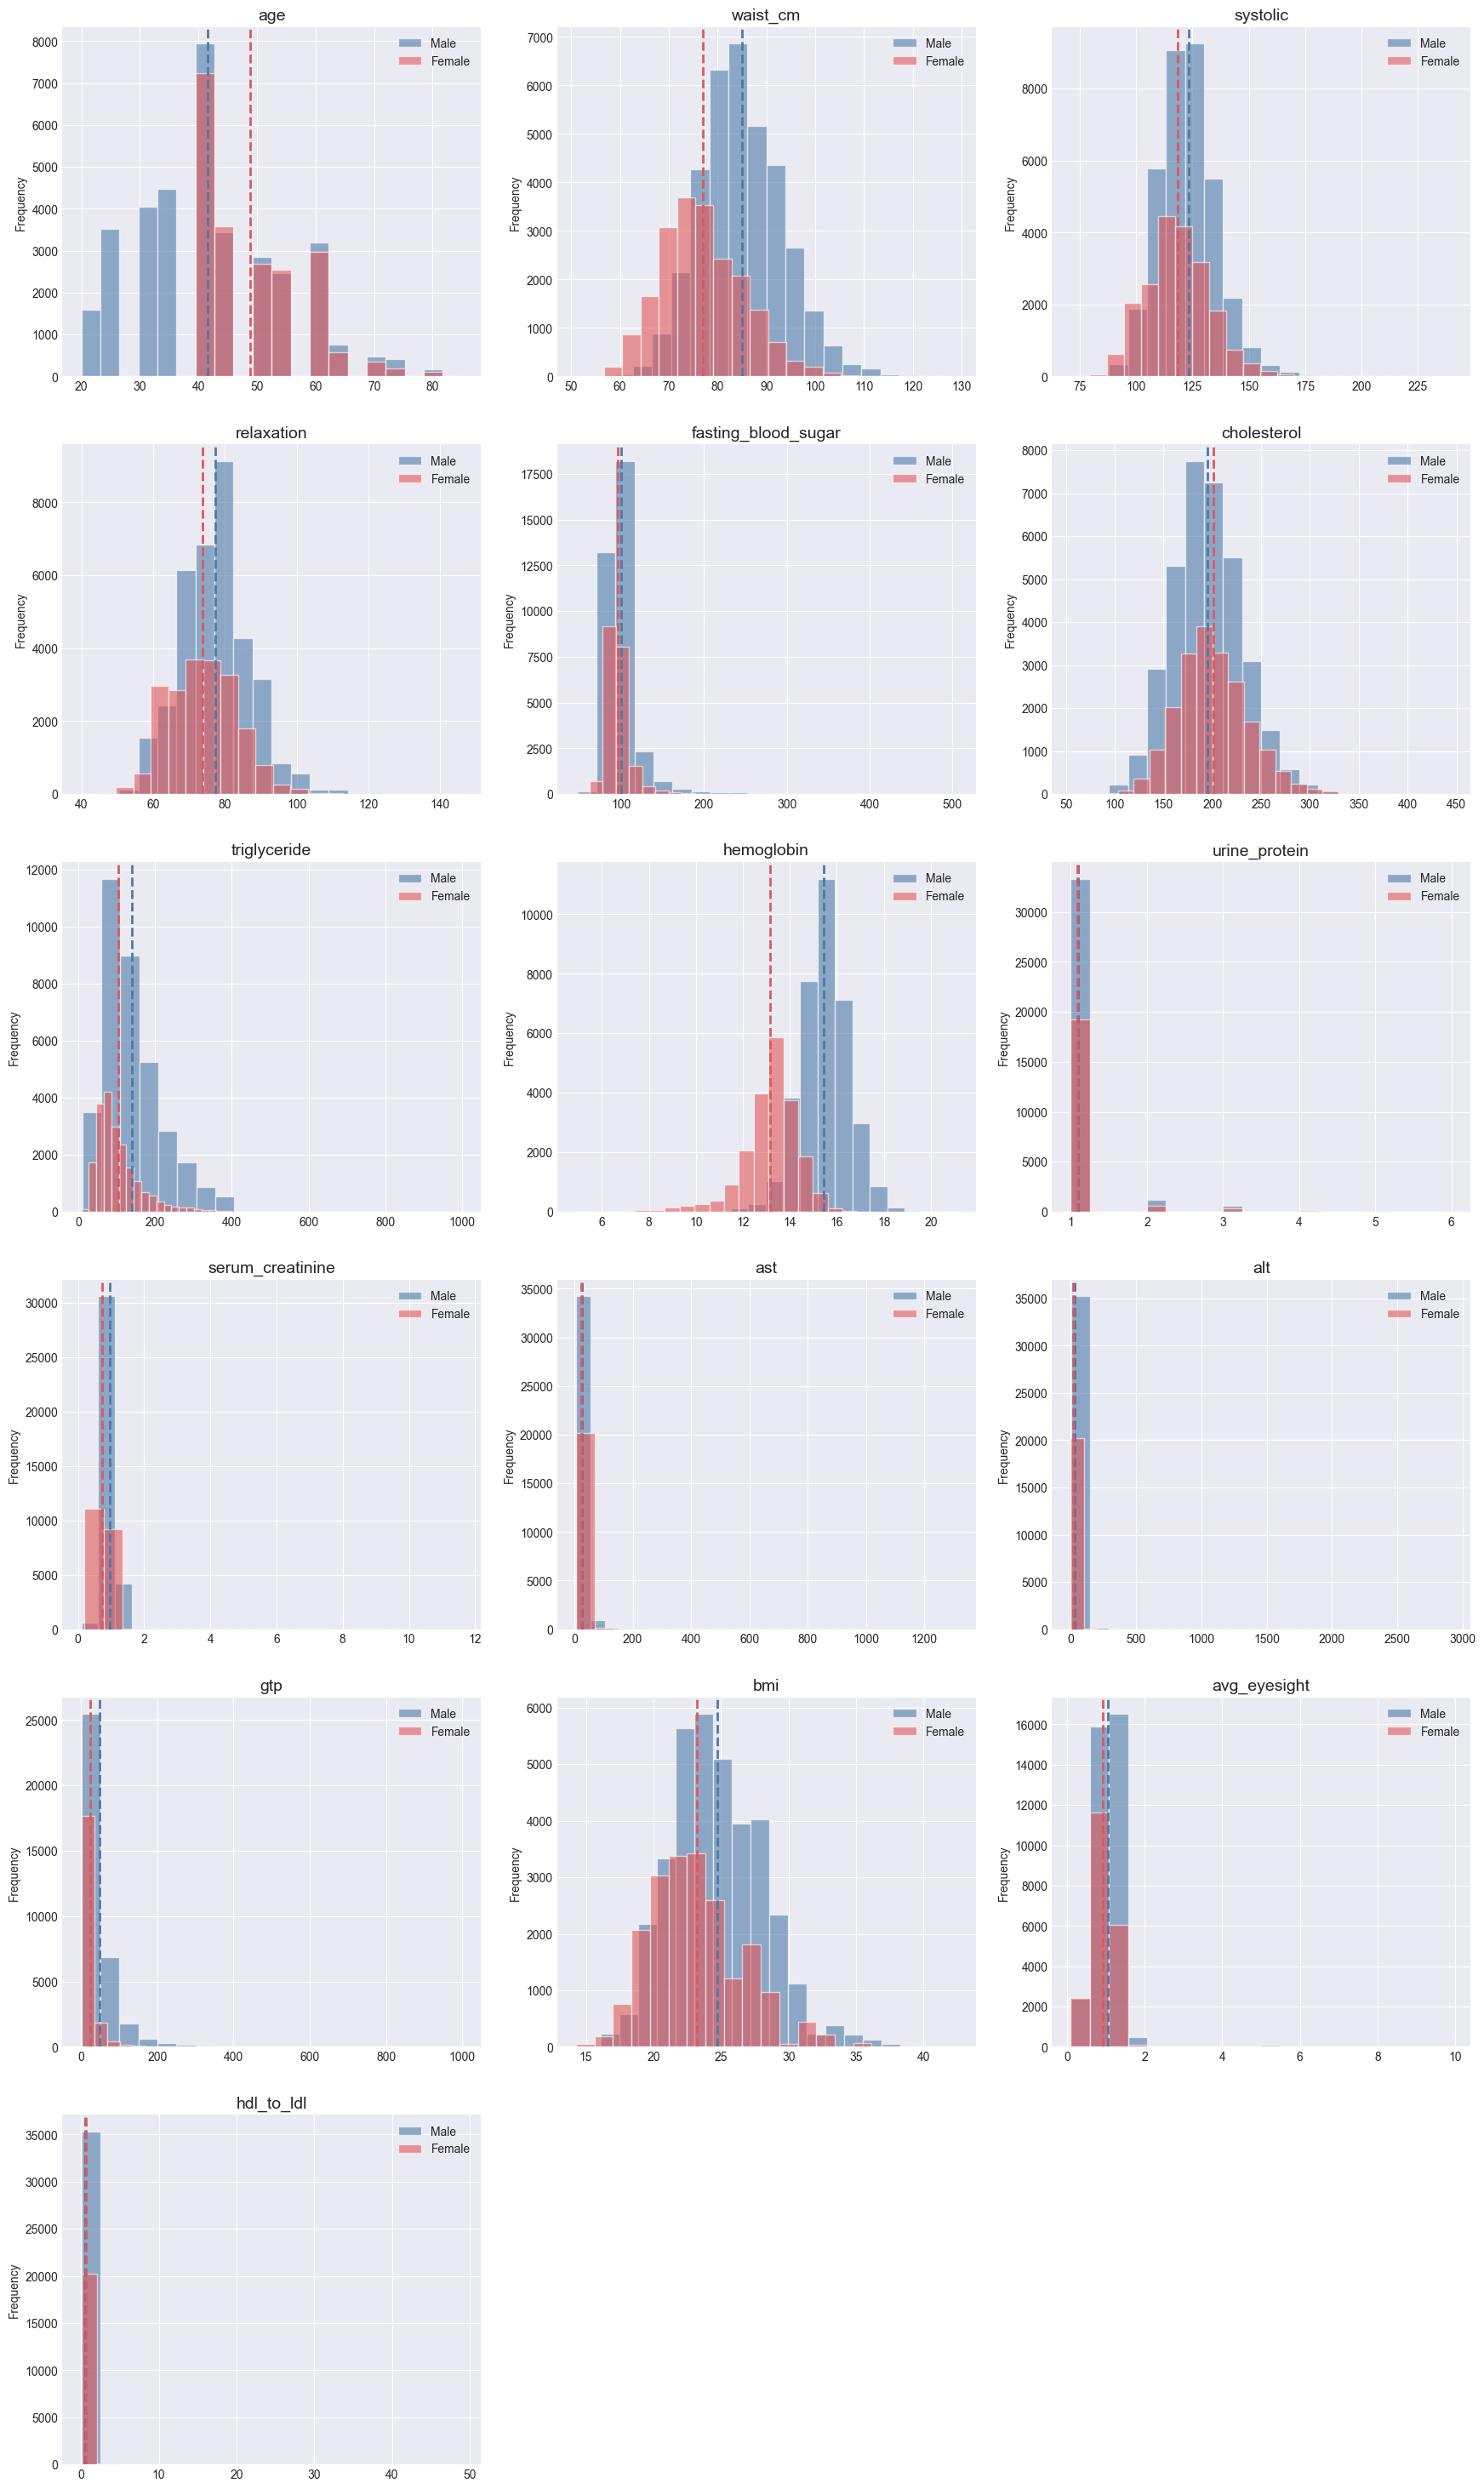

In [37]:
plot_comparison_histogram_style(numeric_cols,male,"Male",female,"Female")

In [38]:
male_ou = remove_outliers_iqr(male,numeric_cols) 
female_ou = remove_outliers_iqr(female,numeric_cols)

Original shapes:

(35401, 20)
Without outliers:

(21510, 20)
Original shapes:

(20291, 20)
Without outliers:

(12515, 20)


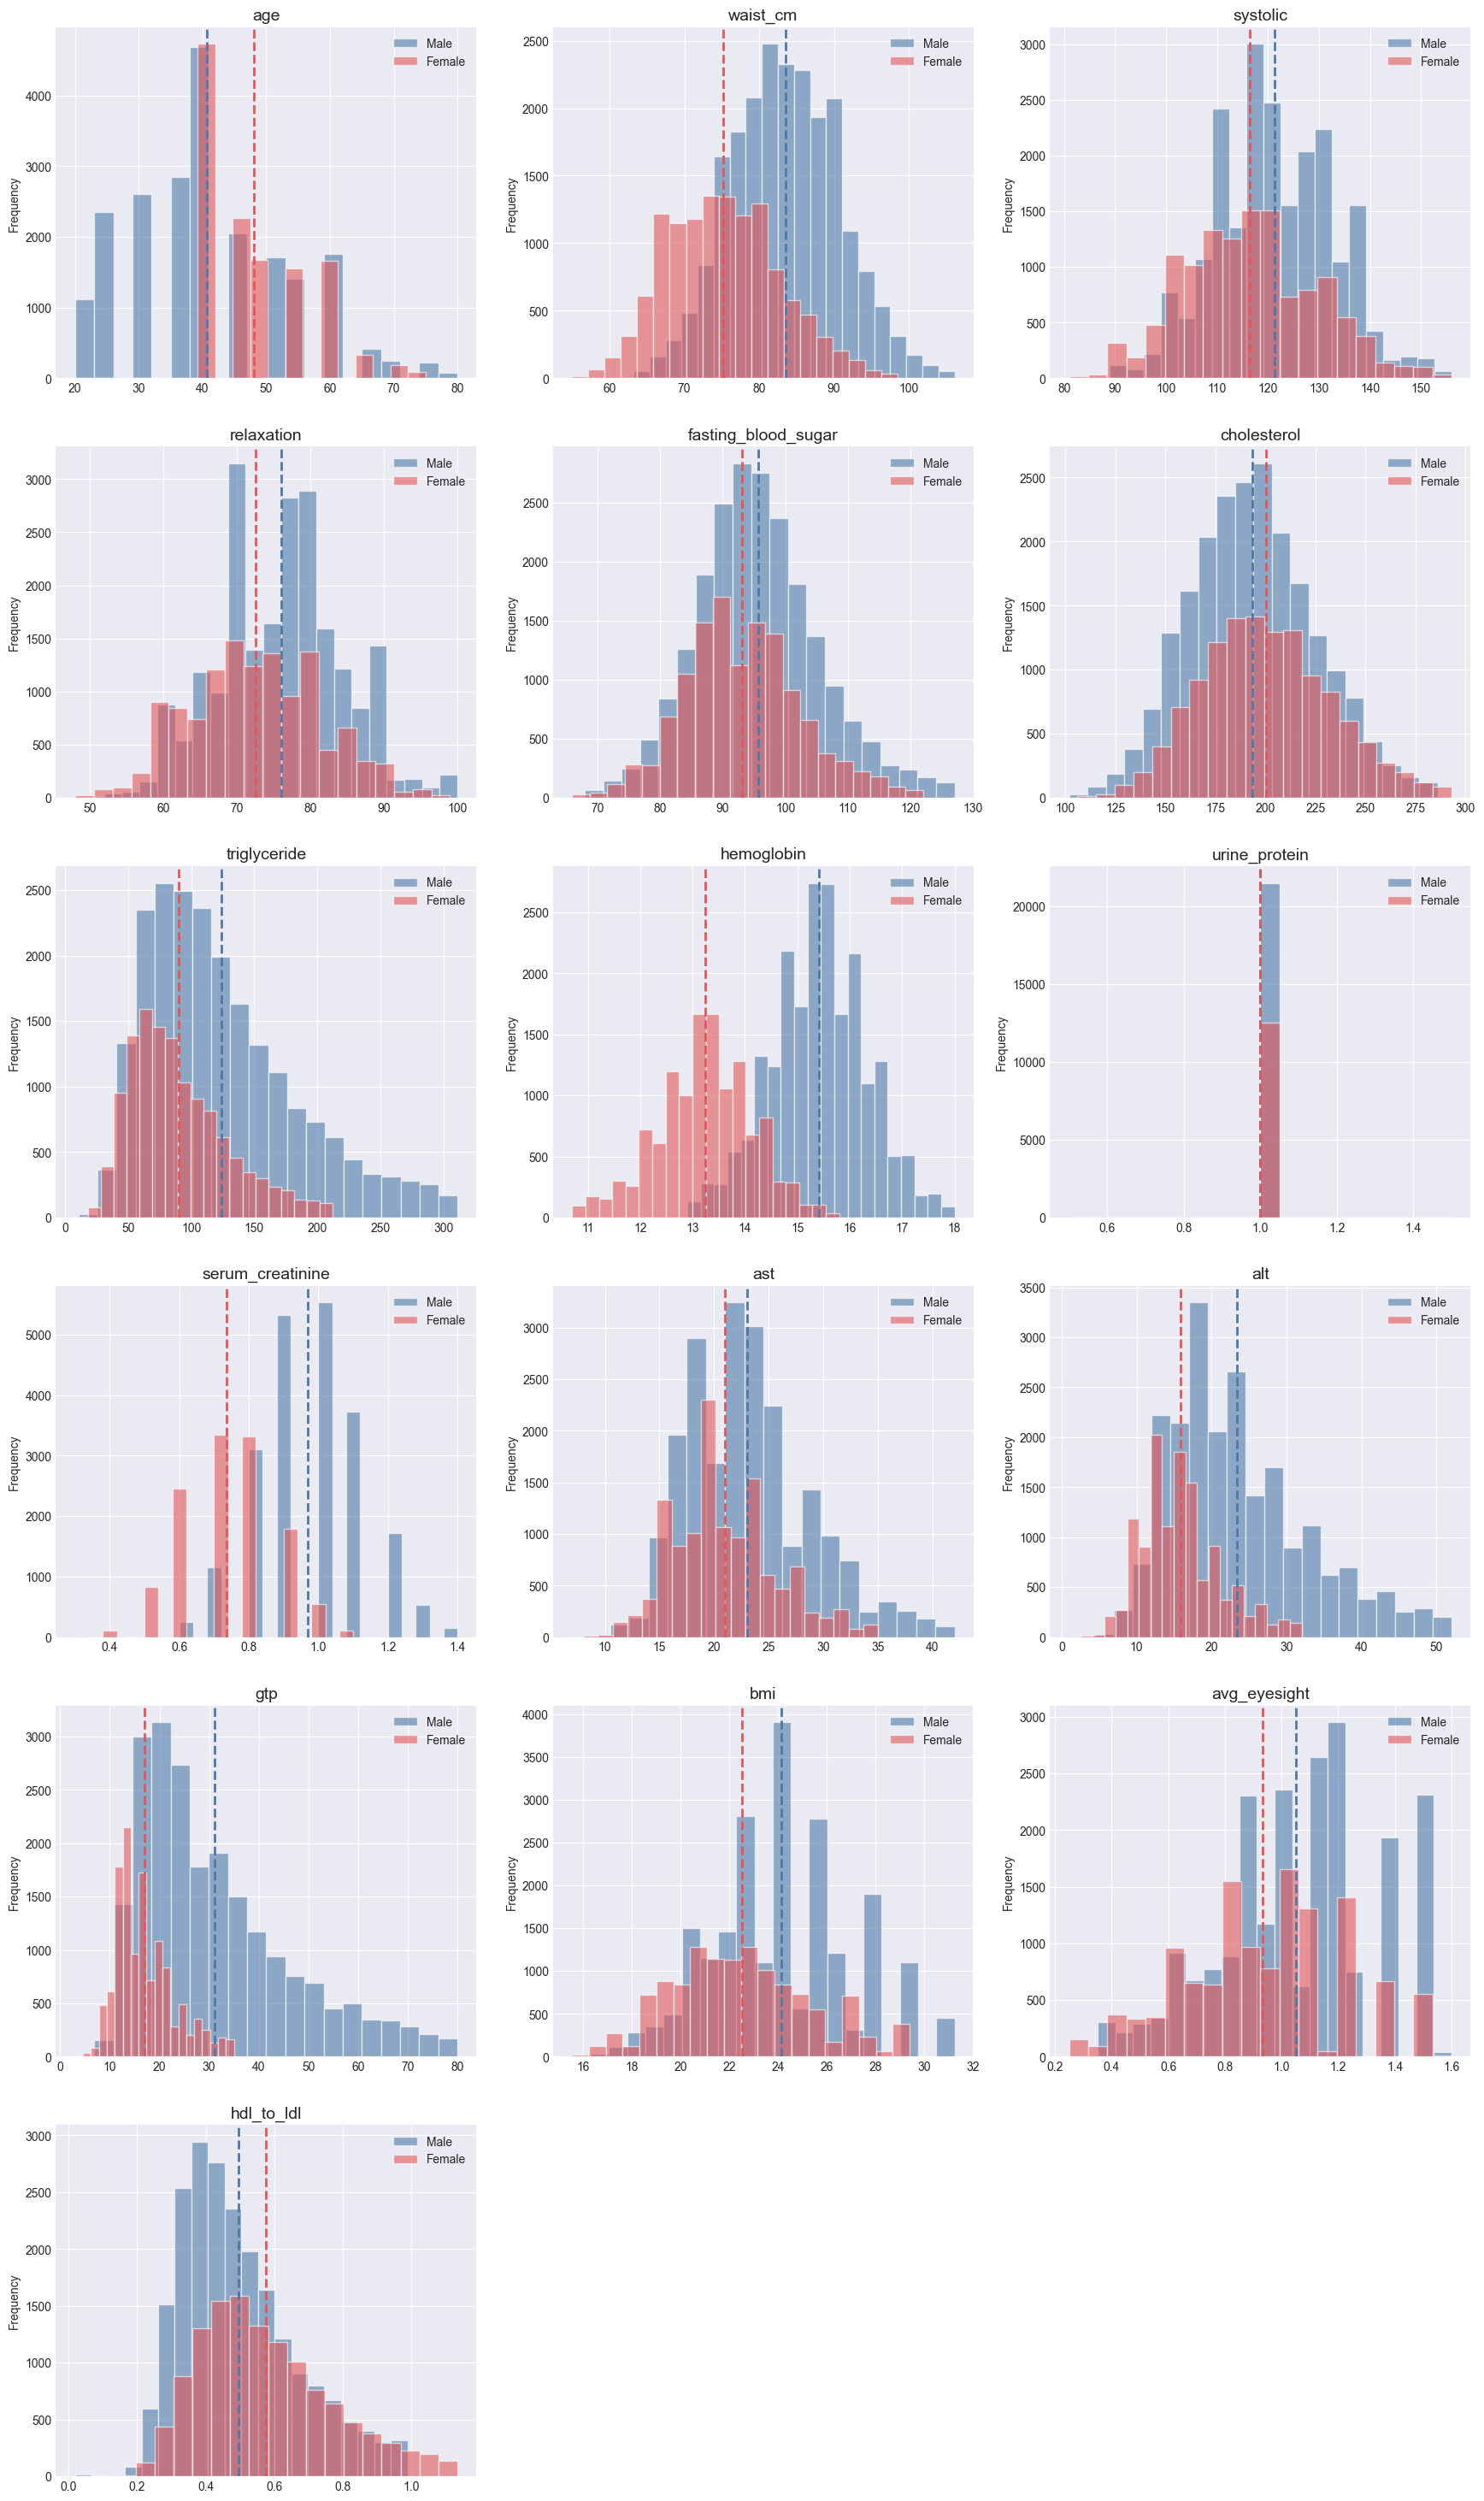

In [39]:
plot_comparison_histogram_style(numeric_cols,male_ou,"Male",female_ou,"Female")

**Non-Smoker-Gender-Based Analysis (Male Non-Smoker vs Female Non-Smoker)**

In [40]:
no_smoking_male = male_ou[male_ou["smoking"] == "No"]
no_smoking_female = female_ou[female_ou["smoking"] == "No"]

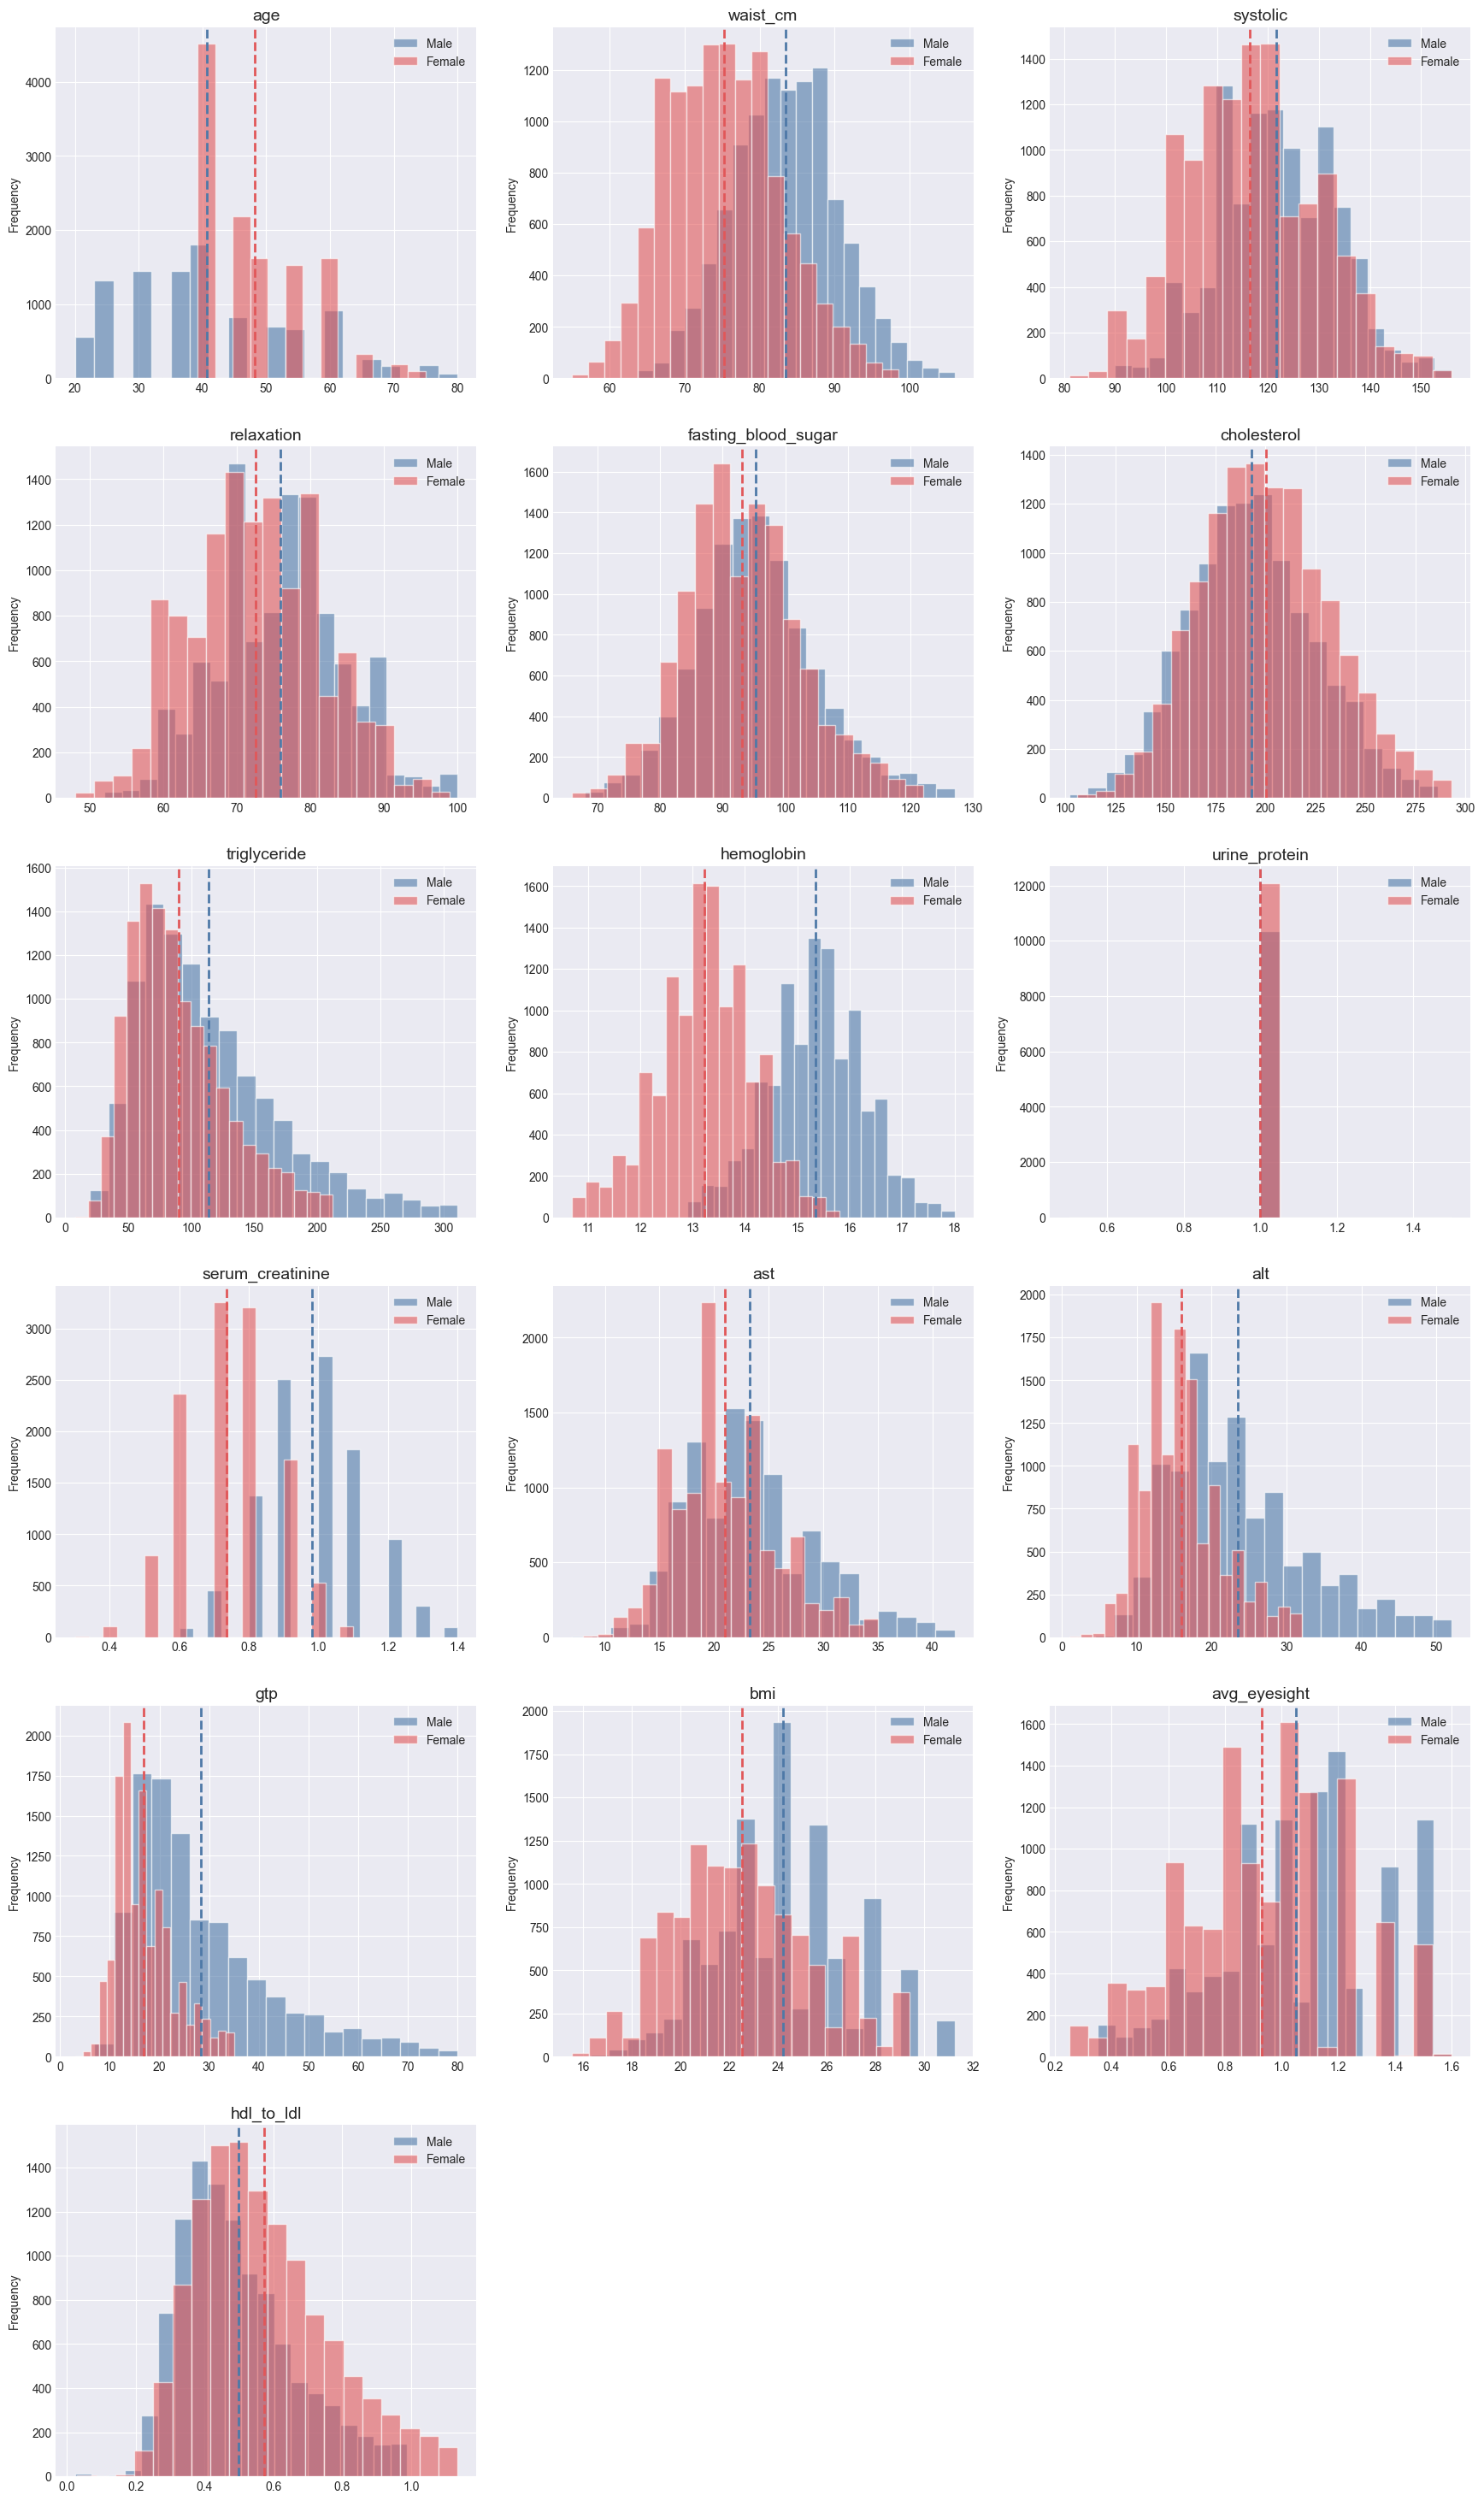

In [41]:
plot_comparison_histogram_style(numeric_cols,no_smoking_male,"Male",no_smoking_female,"Female")

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Dimensionality Reduction
</p>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Preprocessing For Classification
</p>

In [42]:
df_train = df.copy(deep=True)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


num_cols = numeric_cols
onehot_cols = ["gender"]
label_cols = ["dental_caries", "tartar"]

y = df_train["smoking"]
X = df_train.drop(columns=["smoking"])

le = LabelEncoder()
y = le.fit_transform(y)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("gender_ohe", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
        ("label_enc", OrdinalEncoder(), label_cols)
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test:  {X_test.shape}, {y_test.shape}")

feature_names = preprocessor.get_feature_names_out()
print(feature_names)


Train: (44553, 20), (44553,)
Test:  (11139, 20), (11139,)
['num__age' 'num__waist_cm' 'num__systolic' 'num__relaxation'
 'num__fasting_blood_sugar' 'num__cholesterol' 'num__triglyceride'
 'num__hemoglobin' 'num__urine_protein' 'num__serum_creatinine' 'num__ast'
 'num__alt' 'num__gtp' 'num__bmi' 'num__avg_eyesight' 'num__hdl_to_ldl'
 'gender_ohe__gender_Female' 'gender_ohe__gender_Male'
 'label_enc__dental_caries' 'label_enc__tartar']


<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Classification Models
</p>

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "SVM": SVC(C=100, gamma=0.002),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        random_state=42
    )
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results[name] = {
        "Accuracy": round(accuracy_score(y_test, preds)*100, 2),
        "Confusion Matrix": confusion_matrix(y_test, preds),
        "Report": classification_report(y_test, preds)
    }

    print(f"\n{'='*50}")
    print(f"{name}")
    print(f"{'='*50}")
    print("Confusion Matrix:\n", results[name]["Confusion Matrix"])
    print("\nClassification Report:\n", results[name]["Report"])
    print(f"\nAccuracy: {results[name]['Accuracy']} %")



Logistic Regression
Confusion Matrix:
 [[5422 1605]
 [1272 2840]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      7027
           1       0.64      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.74     11139


Accuracy: 74.17 %

Gaussian NB
Confusion Matrix:
 [[4174 2853]
 [ 443 3669]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.59      0.72      7027
           1       0.56      0.89      0.69      4112

    accuracy                           0.70     11139
   macro avg       0.73      0.74      0.70     11139
weighted avg       0.78      0.70      0.71     11139


Accuracy: 70.41 %

Bernoulli NB
Confusion Matrix:
 [[4637 2390]
 [ 839 3273]]

Classification Report:
               precision    recall  f1-score   s

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Final Evaluation and Insights
</p>

<a id="1"></a>

<p style="
    padding:12px;
    background-color:#ffffff;
    margin:0;
    color:#000000;
    font-family:serif;
    font-size:200%;
    text-align:center;
    border-radius: 15px 50px;
    overflow:hidden;
    font-weight:600;
    border: 2px solid #000000;
">
    Thank You
</p>

<br>

### Contact Information

**Name:** Jerónimo Hoyos Botero

**Connect on LinkedIn:** https://www.linkedin.com/in/yourprofile 
 
**Explore Github:** https://github.com/yourusername  

---

### References

- https://www.kaggle.com/code/eisgandar/oversampling-methods-on-unbalanced-datasets
- https://www.kaggle.com/code/eisgandar/smoking-signal-of-body-classification#6-%7C-DATASET-PREPROCESSING
- https://www.kaggle.com/code/bugraorhan/how-your-body-reacts-to-smoking#📊-Step-3:-Exploratory-Data-Analysis-(EDA)
- https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4